# Unsupervised learning capstone

For your third capstone, you’ll complete an unsupervised learning project. You can choose your own research question or choose from one below.

Go out and find a dataset of interest. It could be one that helps you work on one of our recommended research questions, or any other dataset that addresses an unsupervised learning question of your own.

Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

You should try several different approaches and really work to tune a variety of models before choosing what you consider to be the best performer.

Things to keep in mind: how do clustering and modeling compare? What are the advantages of each? Why would you want to use one over the other?

Be prepared to talk about:

- Your end-user and the value your project provides to them.
- Quantifiable results based on the research you’ve conducted.
- The visuals you chose and what they represent for your research.
- Next steps you'd take to expand on your work.
- A specified research question your model addresses.
- How you chose your model specification and what alternatives you compared it to.
- The practical uses of your model for an audience of interest.
- Any weak points or shortcomings of your model.

[Animal Outbreaks](https://www.kaggle.com/tentotheminus9/empres-global-animal-disease-surveillance)

# Animal Disease Outbreaks

- data gathered by EMPRES Global Animal Disease Information System (EMPRES-i)
- 1918 avian Influenza
    - infected 500 million
    - killed 50-100 million
- more recently MERS & SARS, caused by Coronavirus

# The Data

- from the Emergency Prevention System for Animal Health (EMPRES)
- 30,000 reports (six sets)
- reported 2015-present
- variables include timing, location, species, disease
- half of the variables missing values

# The Goal
- potential target: outbreaks with pandemic potential
- cluster in terms of severity

# Who?

- CDC, WHO, EMPRES
- farmers, butchers, food preparers
- meat-eaters
- people who live

# The Data

I've chosen to explore, and analze data on [animal disease outbreaks](https://www.kaggle.com/tentotheminus9/empres-global-animal-disease-surveillance) found on Kaggle gathered by EMPRES Global Animal Disease Information System (EMPRES-i), an application created to assist veterinary services by providing information on global diseases. The ability to understand the inception and spread of these diseases and ultimately predict where and how future incidents/episodes will unfold is crucial in our efforts to combat the damage caused. While some may believe the animals' health is irrelevant to us, this couldn't be farther from the truth - on an obvious level, because roughly 90% of the world's population eats meat it is advantageous for us to keep our fellow animals healthy. What is less known but perhaps even more important is that many epidemiologists believe it's likely that the next pandemic will come from an animal, similar to the SARS and MERS viruses that have killed hundreds.

The data includes 30,000 reports of animal outbreaks. Each row represents a different outbreak so there are some repeating diseases. Variables include timing, place, species, and diseases, as well as information on the number of animals and humans affected. I'll use clutering and other unsupervised learning in an effort to learn about the onset and dispersion of animal disease outbreaks. Ideally, the data will collect in such a way that I am able to differentiate/locate/predict outbreaks with pandemic potential.

In [53]:
import os
os.chdir('/Users/sophiaperides/Desktop/Thinkful')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import re


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import scipy.stats as stats


import keras
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, TSNE
import umap
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import datasets, metrics
from sklearn.neural_network import BernoulliRBM
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage as lnkg

# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from keras.layers import Input,Dense
# from keras.models import Model
# from sklearn import ensemble
# import keras

In [54]:
outbreaks1 = pd.read_csv('Outbreak1.csv')
outbreaks2 = pd.read_csv('Outbreak2.csv')
outbreaks3 = pd.read_csv('Outbreak3.csv')
outbreaks4 = pd.read_csv('Outbreak4.csv')
outbreaks5 = pd.read_csv('Outbreak5.csv')
outbreaks6 = pd.read_csv('Outbreak6.csv')
outbreaks = pd.DataFrame(outbreaks1.append([outbreaks2, outbreaks3, outbreaks4, outbreaks5, outbreaks6]))
print(outbreaks.columns)
print(outbreaks.info())
outbreaks.head(10)

Index(['Id', 'source', 'latitude', 'longitude', 'region', 'country', 'admin1',
       'localityName', 'localityQuality', 'observationDate', 'reportingDate',
       'status', 'disease', 'serotypes', 'speciesDescription', 'sumAtRisk',
       'sumCases', 'sumDeaths', 'sumDestroyed', 'sumSlaughtered',
       'humansGenderDesc', 'humansAge', 'humansAffected', 'humansDeaths'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 4999
Data columns (total 24 columns):
Id                    30000 non-null int64
source                30000 non-null object
latitude              30000 non-null float64
longitude             30000 non-null float64
region                30000 non-null object
country               30000 non-null object
admin1                30000 non-null object
localityName          30000 non-null object
localityQuality       30000 non-null object
observationDate       29314 non-null object
reportingDate         30000 non-null object
status     

,Id,source,latitude,longitude,region,country,admin1,localityName,localityQuality,observationDate,reportingDate,status,disease,serotypes,speciesDescription,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansGenderDesc,humansAge,humansAffected,humansDeaths
0,264093,OIE,18.240550,-70.282265,Americas,Dominican Republic,Peravia,Peravia,Exact,17/09/2019,19/12/2019,Confirmed,Newcastle disease,NaN,"domestic, chicken",13191.0,13191.0,6809.0,6382.0,NaN,NaN,NaN,NaN,NaN
1,264044,OIE,44.109900,26.804200,Europe,Romania,Calarasi,Chislet,Exact,23/12/2019,23/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,264043,OIE,44.931200,25.626100,Europe,Romania,Dimbovita,Adanca,Exact,23/12/2019,23/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
3,264042,OIE,45.161400,25.392900,Europe,Romania,Dimbovita,Runcu,Exact,20/12/2019,23/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",NaN,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,264041,OIE,44.974100,25.464800,Europe,Romania,Dimbovita,Viforata,Exact,19/12/2019,23/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",18.0,18.0,1.0,17.0,NaN,NaN,NaN,NaN,NaN
5,264040,OIE,45.194500,26.975600,Europe,Romania,Buzau,Boboc,Exact,12/12/2019,23/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",7.0,7.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN
6,264039,OIE,47.190800,22.512200,Europe,Romania,Bihor,Lapis,Exact,20/12/2019,23/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,264038,OIE,47.743900,23.311200,Europe,Romania,Maramures,Sabisa,Exact,14/12/2019,20/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
8,264037,OIE,44.818976,25.821518,Europe,Romania,Dimbovita,Finta,Exact,18/12/2019,20/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
9,264036,OIE,44.666521,23.574296,Europe,Romania,Gorj,Turburea,Exact,16/12/2019,20/12/2019,Confirmed,African swine fever,NaN,"wild, wild boar",NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [55]:
print('Value counts for humansAffected: ', outbreaks.humansAffected.value_counts())
print('Value counts for humansDeaths: ', outbreaks.humansDeaths.value_counts())

Value counts for humansAffected:  1.0      1589
0.0        16
3.0         2
11.0        1
5.0         1
78.0        1
100.0       1
145.0       1
24.0        1
4.0         1
2.0         1
Name: humansAffected, dtype: int64
Value counts for humansDeaths:  1.0    434
0.0     32
2.0      2
6.0      1
3.0      1
Name: humansDeaths, dtype: int64


# The Cleaning

- dropped localityName & humansGenderDesc
- >17,000 missing serotypes
- <2,000 missing species
    - additional features
- mean for most float variables
- mode for humansAffected & humansDeaths
- <1,000 observationDates missing
    - additional feature


# The Cleaning

More than half of the variables are not missing any data which is a great start. Just under 7,000 rows are missing information on serotypes so I will fill these with 'Unknown Serotypes'. Similarly, under 2,000 rows are missing in speciesDescription, so these will be filled with 'Unknown Species'. Additionally, the information populating these cells are lists of animals so I will create new dummy variables with keywords, including 'wild' and 'domestic'. Finally, I'll create new features 'birds' and 'mammals' which will indicate whether a disease affected these classes.

Empty cells in sumAtRisk, sumCases, sumDeaths, sumDestroyed, sumSlaughtered, and humansAge will be filled with the mean value of these columns. I will drop the column humansGenderDesc as there is simply not enough information for me to populate the missing values. As for humansAffected and humansDeaths, I'll populate missing values with the mode.

All dates in the data will be converted to datetime objects and create variables for the year, month, and day of the observation. Missing variables in observationDate will be filled by finding the average difference between the observationDate and reportingDate, and subtracting this number from the reportingDate. A new variable, 'differenceInDays', will be created by finding the difference between the observationDate and reportingDate for each instance. There are just over 3,700 entries with observationDate values after reportingDates. This is impossible, so I will delete these rows.

Dummies will be created for source, region, country, localityQuality, disease, serotypes, and status.

In [56]:
outbreaks.serotypes.fillna('UnknownSerotypes', inplace=True)
outbreaks.speciesDescription.fillna('UnknownSpecies', inplace=True)
outbreaks.sumAtRisk.fillna(outbreaks.sumAtRisk.mean(), inplace=True)
outbreaks.sumCases.fillna(outbreaks.sumCases.mean(), inplace=True)
outbreaks.sumDeaths.fillna(outbreaks.sumDeaths.mean(), inplace=True)
outbreaks.sumDestroyed.fillna(outbreaks.sumDestroyed.mean(), inplace=True)
outbreaks.sumSlaughtered.fillna(outbreaks.sumSlaughtered.mean(), inplace=True)
outbreaks.drop(columns=['humansGenderDesc'], inplace=True)
outbreaks.humansAge.fillna(outbreaks.humansAge.mean(), inplace=True)
outbreaks.humansAffected.fillna(outbreaks.humansAffected.mode()[0], inplace=True)
outbreaks.humansDeaths.fillna(outbreaks.humansDeaths.mode()[0], inplace=True)
outbreaks.shape

(30000, 23)

In [57]:
print('Reporting Dates: \n', outbreaks.reportingDate.head())
print('Observation Dates: \n', outbreaks.observationDate.head())

Reporting Dates: 
 0    19/12/2019
1    23/12/2019
2    23/12/2019
3    23/12/2019
4    23/12/2019
Name: reportingDate, dtype: object
Observation Dates: 
 0    17/09/2019
1    23/12/2019
2    23/12/2019
3    20/12/2019
4    19/12/2019
Name: observationDate, dtype: object


In [58]:
# Creating a new dataframe to handle the dates
outbreaks['observationDate'] = pd.to_datetime(outbreaks['observationDate'])
outbreaks['reportingDate'] = pd.to_datetime(outbreaks['reportingDate'])
outbreaks_time = outbreaks[['observationDate', 'reportingDate']]
outbreaks_time.dropna(inplace=True)

# Find the average difference between observation and reporting dates
outbreaks_time['differenceInDays'] = (outbreaks_time['reportingDate'] - outbreaks_time['observationDate'])/np.timedelta64(1,'D')
                                                                     
print('Average difference between observation and reporting dates: ', outbreaks_time['differenceInDays'].mean())
outbreaks.observationDate.fillna(outbreaks.reportingDate - timedelta(days=33), inplace=True)

# Creating a new variable
outbreaks['differenceInDays'] = (outbreaks['reportingDate'] - outbreaks['observationDate'])/np.timedelta64(1,'D')


Average difference between observation and reporting dates:  29.083953059971346


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
print(outbreaks.columns)
outbreaks.shape


Index(['Id', 'source', 'latitude', 'longitude', 'region', 'country', 'admin1',
       'localityName', 'localityQuality', 'observationDate', 'reportingDate',
       'status', 'disease', 'serotypes', 'speciesDescription', 'sumAtRisk',
       'sumCases', 'sumDeaths', 'sumDestroyed', 'sumSlaughtered', 'humansAge',
       'humansAffected', 'humansDeaths', 'differenceInDays'],
      dtype='object')


(30000, 24)

In [60]:
outbreaks['observationYear'] = pd.DatetimeIndex(outbreaks['observationDate']).year
outbreaks['observationMonth'] = pd.DatetimeIndex(outbreaks['observationDate']).month
outbreaks['observationDay'] = pd.DatetimeIndex(outbreaks['observationDate']).day
outbreaks['observationFirstHalfMonth'] = outbreaks['observationDay'].apply(lambda x: 1 if x <= 15 else 0 )
outbreaks['observationSecondHalfMonth'] = outbreaks['observationDay'].apply(lambda x: 1 if x > 15 else 0 )

In [61]:
print('Unique values in source: ', len(outbreaks.source.unique()))
print('Unique values in region: ', len(outbreaks.region.unique()))
print('Unique values in country: ', len(outbreaks.country.unique()))
print('Unique values in admin1: ', len(outbreaks.admin1.unique()))
print('Unique values in localityName: ', len(outbreaks.localityName.unique()))
print('Unique values in localityQuality: ', len(outbreaks.localityQuality.unique()))
print('Unique values in status: ', len(outbreaks.status.unique()))
print('Unique values in disease: ', len(outbreaks.disease.unique()))
print('Unique values in serotypes: ', len(outbreaks.serotypes.unique()))
print('Unique values in speciesDescription: ', len(outbreaks.speciesDescription.unique()))


Unique values in source:  14
Unique values in region:  4
Unique values in country:  140
Unique values in admin1:  1312
Unique values in localityName:  16763
Unique values in localityQuality:  5
Unique values in status:  2
Unique values in disease:  25
Unique values in serotypes:  62
Unique values in speciesDescription:  371


In [194]:
print('Unique values in source: ', outbreaks.source.unique())
print('Unique values in region: ', outbreaks.region.unique())
# print('Unique values in country: ', len(outbreaks.country.unique())
# print('Unique values in admin1: ', len(outbreaks.admin1.unique())
# print('Unique values in localityName: ', len(outbreaks.localityName.unique()))
print('Unique values in localityQuality: ', outbreaks.localityQuality.unique())
print('Unique values in status: ', outbreaks.status.unique())
print('Unique values in disease: ', outbreaks.disease.unique())
print('Unique values in serotypes: ', outbreaks.serotypes.unique())
# print('Unique values in speciesDescription: ', len(outbreaks.speciesDescription.unique()))


Unique values in source:  ['OIE' 'Other' 'National authorities' 'FAO Field Officer' 'FAO-Report'
 'FAO ECTAD RAF' 'UN Field Officer' 'Media' 'WHO'
 'International reference laboratory'
 'National Institute for Communicable Diseases, NICD' 'EC' 'FAO officer'
 'sequence only']
Unique values in region:  ['Americas' 'Europe' 'Asia' 'Africa']
Unique values in localityQuality:  ['Exact' 'Centroid Locality' 'Centroid Admin1' 'Unknown' 'Centroid Admin2']
Unique values in status:  ['Confirmed' 'Denied']
Unique values in disease:  ['Newcastle disease' 'African swine fever' 'Foot and mouth disease'
 'Rabies' 'Influenza - Avian' 'Rift Valley fever' 'Bluetongue'
 'Classical swine fever' 'MERS-CoV ' 'West Nile Fever'
 'Lumpy skin disease' 'Equine infectious anaemia'
 'Peste des petits ruminants' 'Sheep pox and goat pox' 'Anthrax'
 'Influenza - Equine' 'Glanders' 'Bovine spongiform encephalopathy'
 'Contagious bovine pleuropneumonia' 'Brucellosis (Brucella abortus)'
 'Brucellosis (Brucella melitensis

In [62]:
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['source'])], axis=1)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['region'])], axis=1)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['country'])], axis=1)
outbreaks.drop(columns=['admin1', 'localityName'], inplace=True)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['localityQuality'])], axis=1)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['status'])], axis=1)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['disease'])], axis=1)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['serotypes'])], axis=1)
outbreaks.shape

(30000, 279)

In [ ]:
## speciesDescription

In [63]:
outbreaks.speciesDescription.unique()

array(['domestic, chicken', 'wild, wild boar', 'domestic, swine',
       'domestic, cattle', 'domestic, dog', 'domestic, cat',
       'domestic, unspecified bird', 'domestic, ostrich',
       'domestic, goat/sheep ', 'domestic, sheep',
       'wild,mute swan (cygnus olor))', 'UnknownSpecies',
       'domestic, duck', 'domestic, turkey', 'domestic, goose',
       'wild, crow', 'environmental sample, unspecified bird',
       'domestic, equidae', 'domestic, muscovy ducks', 'domestic, quail',
       'environmental sample, unspecified env. sample, environmental sample, unspecified env. sample',
       'environmental sample, unspecified env. sample', 'domestic, horse',
       'wild, unspecified bird', 'wild, owl',
       'environmental sample, unspecified bird, environmental sample, unspecified bird',
       'domestic, goat, domestic, sheep',
       'wild,rose pelican (pelecanus onocrotalus))',
       'wild,greater flamingo (phoenicopterus roseus))', 'domestic, goat',
       'domestic, catt

In [64]:
outbreaks['wild'] = outbreaks.speciesDescription.apply(lambda x: 1 if 'wild' in x else 0)
outbreaks['undomestic'] = outbreaks.speciesDescription.apply(lambda x: 1 if 'undomestic' in x else 0)
outbreaks['domestic'] = outbreaks.speciesDescription.apply(lambda x: 1 if 'domestic' in x else 0)
outbreaks['captive'] = outbreaks.speciesDescription.apply(lambda x: 1 if 'captive' in x else 0)
outbreaks['unspecified'] = outbreaks.speciesDescription.apply(lambda x: 1 if 'unspecified' in x else 0)
outbreaks.head(10)

,Id,source,latitude,longitude,region,country,localityQuality,observationDate,reportingDate,status,disease,serotypes,speciesDescription,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansAge,humansAffected,humansDeaths,differenceInDays,observationYear,observationMonth,observationDay,observationFirstHalfMonth,observationSecondHalfMonth,EC,FAO ECTAD RAF,FAO Field Officer,FAO officer,FAO-Report,International reference laboratory,Media,"National Institute for Communicable Diseases, NICD",National authorities,OIE,Other,UN Field Officer,WHO,sequence only,Africa,Americas,Asia,Europe,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Austria,Bahrain,Bangladesh,Belarus,Belgium,Belize,Bhutan,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Croatia,Cyprus,Czech Republic,Côte d'Ivoire,Dem People's Rep of Korea,Democratic Republic of the Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Finland,France,Gambia,Gaza Strip,Georgia,Germany,Ghana,Greece,Guinea,Guinea-Bissau,Honduras,"Hong Kong, SAR",Hungary,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Libya,Lithuania,Luxembourg,Macau,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mayotte,Mexico,"Moldova, Republic of",Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,Niger,Nigeria,Oman,Pakistan,Panama,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Romania,Russian Federation,Rwanda,Saudi Arabia,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,South Africa,South Sudan,Spain,Sudan,Svalbard and Jan Mayen Islands,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Taiwan (Province of China),Thailand,The former Yugoslav Republic of Macedonia,Timor-Leste,Togo,Tunisia,Turkey,U.K. of Great Britain and Northern Ireland,Uganda,Ukraine,United Arab Emirates,United Republic of Tanzania,United States of America,Uruguay,Viet Nam,West Bank,Zambia,Zimbabwe,Centroid Admin1,Centroid Admin2,Centroid Locality,Exact,Unknown,Confirmed,Denied,African horse sickness,African swine fever,Anthrax,Bluetongue,Bovine spongiform encephalopathy,Bovine tuberculosis,Brucellosis (Brucella abortus),Brucellosis (Brucella melitensis),Brucellosis (Brucella suis),Classical swine fever,Contagious bovine pleuropneumonia,Equine infectious anaemia,Foot and mouth disease,Glanders,Influenza - Avian,Influenza - Equine,Lumpy skin disease,MERS-CoV,Newcastle disease,Peste des petits ruminants,Porcine reproductive and respiratory syndrome,Rabies,Rift Valley fever,Sheep pox and goat pox,West Nile Fever,1,16,19,2,22,3,4,5,7,8,"8, 4",A,"A, O",APMV-I,Asia 1,H3 LPAI,H3N1 LPAI,H3N8,H5 HPAI,H5 LPAI,H5N1 HPAI,H5N1 LPAI,"H5N1 LPAI, H5N2 LPAI",H5N2 HPAI,H5N2 LPAI,"H5N2 LPAI, H6N2 LPAI","H5N2 LPAI, H7N7 LPAI",H5N3 HPAI,H5N3 LPAI,"H5N3 LPAI, H5N2 LPAI",H5N5 HPAI,H5N5 LPAI,H5N6 HPAI,H5N6 LPAI,H5N8 HPAI,"H5N8 HPAI, H5N2 HPAI",H5N8 LPAI,H5N9 HPAI,H5N9 LPAI,H6N2 LPAI,H7 LPAI,H7N1 HPAI,H7N1 LPAI,H7N2 LPAI,H7N3 HPAI,H7N3 LPAI,H7N4 LPAI,H7N6 LPAI,H7N7 HPAI,H7N7 LPAI,H7N9 HPAI,H7N9 LPAI,H9N2 LPAI,HPAI,LPAI,Not Specified,Not specified,O,SAT1,SAT2,SAT3,UnknownSerotypes,wild,undomestic,domestic,captive,unspecified
0,264093,OIE,18.240550,-70.282265,Americas,Dominican Republic,Exact,2019-09-17,2019-12-19,Confirmed,Newcastle disease,UnknownSerotypes,"domestic, chicken",13191.000000,13191.0,6809.000000,6382.000000,202.743361,8.823313,1.0,1.0,93.0,2019,9,17,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [65]:
birds = ['bird', 'swan', 'turkey', 'mallard', 'goose', 'duck', 'pigeon', 'heron', 'accipitridae', 'gull', 
         'phasianidae', 'eagle', 'chicken', 'buzzard', 'falcon', 'anatidae', 'fowl', 'eider', 'pelican', 'wigeon',
        'dove', 'rook', 'stork', 'egret', ' peafowl', 'cormorant', 'coot', 'crow', 'scaup', 'teal', 'magpie', 
         'kestrel', 'blackbird', 'gadwall', 'pochard', 'shelduck', 'parrot', 'tern', ' grebe', 'flamingo', 'eagle-owl',
        'accipiter gentilis', 'ibis', 'ibex', 'emu', 'xpeacock', 'magpie-robin', 'ostrich']
mammals = ['swine', 'boar', 'equidae', 'dog', 'sheep', 'cat', 'goat/sheep', 'goat', 'camelidae', 'horse',
          'fox', 'jackal', ' saiga', 'yaks', 'hippopotamus', 'buffaloe', 'deer', 'canine', 'elephant', 'mammal', 'cattle']

outbreaks['speciesDescription'] = outbreaks.speciesDescription.apply(lambda x: re.split('\s', x))
outbreaks['birds'] = outbreaks.speciesDescription.apply(lambda x: 1 if len(set(x) & set(birds)) > 0  else 0) 
outbreaks['mammals'] = outbreaks.speciesDescription.apply(lambda x: 1 if len(set(x) & set(mammals)) > 0  else 0)

print(outbreaks.shape)
outbreaks.head()


(30000, 286)


,Id,source,latitude,longitude,region,country,localityQuality,observationDate,reportingDate,status,disease,serotypes,speciesDescription,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansAge,humansAffected,humansDeaths,differenceInDays,observationYear,observationMonth,observationDay,observationFirstHalfMonth,observationSecondHalfMonth,EC,FAO ECTAD RAF,FAO Field Officer,FAO officer,FAO-Report,International reference laboratory,Media,"National Institute for Communicable Diseases, NICD",National authorities,OIE,Other,UN Field Officer,WHO,sequence only,Africa,Americas,Asia,Europe,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Austria,Bahrain,Bangladesh,Belarus,Belgium,Belize,Bhutan,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Croatia,Cyprus,Czech Republic,Côte d'Ivoire,Dem People's Rep of Korea,Democratic Republic of the Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Finland,France,Gambia,Gaza Strip,Georgia,Germany,Ghana,Greece,Guinea,Guinea-Bissau,Honduras,"Hong Kong, SAR",Hungary,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Libya,Lithuania,Luxembourg,Macau,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mayotte,Mexico,"Moldova, Republic of",Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,Niger,Nigeria,Oman,Pakistan,Panama,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Romania,Russian Federation,Rwanda,Saudi Arabia,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,South Africa,South Sudan,Spain,Sudan,Svalbard and Jan Mayen Islands,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Taiwan (Province of China),Thailand,The former Yugoslav Republic of Macedonia,Timor-Leste,Togo,Tunisia,Turkey,U.K. of Great Britain and Northern Ireland,Uganda,Ukraine,United Arab Emirates,United Republic of Tanzania,United States of America,Uruguay,Viet Nam,West Bank,Zambia,Zimbabwe,Centroid Admin1,Centroid Admin2,Centroid Locality,Exact,Unknown,Confirmed,Denied,African horse sickness,African swine fever,Anthrax,Bluetongue,Bovine spongiform encephalopathy,Bovine tuberculosis,Brucellosis (Brucella abortus),Brucellosis (Brucella melitensis),Brucellosis (Brucella suis),Classical swine fever,Contagious bovine pleuropneumonia,Equine infectious anaemia,Foot and mouth disease,Glanders,Influenza - Avian,Influenza - Equine,Lumpy skin disease,MERS-CoV,Newcastle disease,Peste des petits ruminants,Porcine reproductive and respiratory syndrome,Rabies,Rift Valley fever,Sheep pox and goat pox,West Nile Fever,1,16,19,2,22,3,4,5,7,8,"8, 4",A,"A, O",APMV-I,Asia 1,H3 LPAI,H3N1 LPAI,H3N8,H5 HPAI,H5 LPAI,H5N1 HPAI,H5N1 LPAI,"H5N1 LPAI, H5N2 LPAI",H5N2 HPAI,H5N2 LPAI,"H5N2 LPAI, H6N2 LPAI","H5N2 LPAI, H7N7 LPAI",H5N3 HPAI,H5N3 LPAI,"H5N3 LPAI, H5N2 LPAI",H5N5 HPAI,H5N5 LPAI,H5N6 HPAI,H5N6 LPAI,H5N8 HPAI,"H5N8 HPAI, H5N2 HPAI",H5N8 LPAI,H5N9 HPAI,H5N9 LPAI,H6N2 LPAI,H7 LPAI,H7N1 HPAI,H7N1 LPAI,H7N2 LPAI,H7N3 HPAI,H7N3 LPAI,H7N4 LPAI,H7N6 LPAI,H7N7 HPAI,H7N7 LPAI,H7N9 HPAI,H7N9 LPAI,H9N2 LPAI,HPAI,LPAI,Not Specified,Not specified,O,SAT1,SAT2,SAT3,UnknownSerotypes,wild,undomestic,domestic,captive,unspecified,birds,mammals
0,264093,OIE,18.24055,-70.282265,Americas,Dominican Republic,Exact,2019-09-17,2019-12-19,Confirmed,Newcastle disease,UnknownSerotypes,"[domestic,, chicken]",13191.000000,13191.0,6809.0,6382.000000,202.743361,8.823313,1.0,1.0,93.0,2019,9,17,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

There are just over 3,700 entries with observationDate values after reportingDates. While at first glance this may seem impossible, my guess is that these cases were observed after the initial reports so I will leave them.

# Combining Cases

Just under 6,000 outbreaks.

In [67]:
sum_variables = ('sumAtRisk', 'sumCases', 'sumDeaths', 'sumDestroyed', 'sumSlaughtered', 'humansAffected', 
                 'humansDeaths')
mean_variables = ('humansAge', 'differenceInDays', 'observationYear', 'observationMonth', 'observationDay', 
                  'observationFirstHalfMonth','observationSecondHalfMonth','EC', 'FAO ECTAD RAF', 'FAO Field Officer',
                  'FAO officer','FAO-Report', 'International reference laboratory', 'Media', 
                  'National Institute for Communicable Diseases, NICD', 'National authorities', 'OIE', 'Other', 
                  'UN Field Officer',' WHO', 'sequence only', 'Africa', 'Americas', 'Asia', 'Europe', 'Afghanistan',
                  'Albania','Algeria','Angola','Argentina','Armenia','Austria','Bahrain','Bangladesh','Belarus',
                  'Belgium','Belize','Bhutan','Bosnia and Herzegovina','Botswana','Brazil','Bulgaria','Burkina Faso',
                  'Burundi','Cambodia','Cameroon','Canada','Central African Republic','Chad','Chile','China','Colombia',
                  'Comoros','Croatia','Cyprus','Czech Republic','Côte d\'Ivoire','Dem People\'s Rep of Korea',
                  'Democratic Republic of the Congo','Denmark','Dominican Republic','Ecuador','Egypt','El Salvador',
                  'Estonia','Ethiopia','Finland','France','Gambia','Gaza Strip','Georgia','Germany','Ghana','Greece',
                  'Guinea','Guinea-Bissau','Honduras','Hong Kong, SAR','Hungary','India','Indonesia',
                  'Iran  (Islamic Republic of)','Iraq','Ireland','Israel','Italy','Japan','Jordan','Kazakhstan','Kenya',
                  'Kuwait','Kyrgyzstan','Lao People\'s Democratic Republic','Latvia','Lebanon','Lesotho','Libya',
                  'Lithuania','Luxembourg','Macau','Malawi','Malaysia','Maldives','Mali','Malta','Mauritania',
                  'Mauritius','Mayotte','Mexico','Moldova, Republic of','Mongolia','Montenegro','Morocco','Mozambique',
                  'Myanmar','Namibia','Nepal','Netherlands','Niger','Nigeria','Oman','Pakistan','Panama','Peru',
                  'Philippines','Poland','Portugal','Qatar','Republic of Korea','Romania','Russian Federation','Rwanda',
                  'Saudi Arabia','Senegal','Serbia','Sierra Leone','Slovakia','Slovenia','South Africa','South Sudan',
                  'Spain','Sudan','Svalbard and Jan Mayen Islands','Swaziland','Sweden','Switzerland','Syrian Arab Republic',
                  'Taiwan (Province of China)','Thailand','The former Yugoslav Republic of Macedonia','Timor-Leste',
                  'Togo','Tunisia','Turkey','U.K. of Great Britain and Northern Ireland','Uganda','Ukraine',
                  'United Arab Emirates','United Republic of Tanzania','United States of America','Uruguay',
                  'Viet Nam','West Bank','Zambia','Zimbabwe','Centroid Admin1','Centroid Admin2','Centroid Locality',
                  'Exact','Unknown','Confirmed','Denied','African horse sickness','African swine fever','Anthrax',
                  'Bluetongue','Bovine spongiform encephalopathy','Bovine tuberculosis','Brucellosis (Brucella abortus)',
                  'Brucellosis (Brucella melitensis)','Brucellosis (Brucella suis)','Classical swine fever',
                  'Contagious bovine pleuropneumonia','Equine infectious anaemia','Foot and mouth disease','Glanders',
                  'Influenza - Avian','Influenza - Equine','Lumpy skin disease','MERS-CoV','Newcastle disease',
                  'Peste des petits ruminants','Porcine reproductive and respiratory syndrome','Rabies',
                  'Rift Valley fever', 'Sheep pox and goat pox', 'West Nile Fever')
X = outbreaks.groupby([pd.Grouper(key='observationDate', freq='7D'),
    pd.Grouper(key='disease'),pd.Grouper(key='country')]).agg({'sumAtRisk':'sum','sumCases': 'sum','sumDeaths':'sum','sumDestroyed': 'sum','sumSlaughtered':'sum',
      'humansAffected': 'sum', 'humansDeaths': 'sum','humansAge':'mean','differenceInDays' : 'mean', 
      'observationYear': 'mean', 'observationMonth': 'mean', 'observationDay': 'mean', 'observationFirstHalfMonth': 'mean',
      'observationSecondHalfMonth': 'mean','EC': 'mean', 'FAO ECTAD RAF': 'mean', 'FAO Field Officer': 'mean',
    'FAO officer': 'mean','FAO-Report': 'mean', 'International reference laboratory': 'mean', 'Media': 'mean', 
    'National Institute for Communicable Diseases, NICD': 'mean', 'National authorities': 'mean', 'OIE': 'mean',
      'Other': 'mean', 'UN Field Officer': 'mean','WHO': 'mean', 'sequence only': 'mean', 'Africa': 'mean', 'Americas': 'mean',
      'Asia': 'mean', 'Europe': 'mean', 'Afghanistan': 'mean', 'Albania': 'mean','Algeria': 'mean','Angola': 'mean',
      'Argentina': 'mean','Armenia': 'mean','Austria': 'mean','Bahrain': 'mean','Bangladesh': 'mean','Belarus': 'mean',
    'Belgium': 'mean','Belize': 'mean','Bhutan': 'mean','Bosnia and Herzegovina': 'mean','Botswana': 'mean','Brazil': 'mean',
      'Bulgaria': 'mean','Burkina Faso': 'mean','Burundi': 'mean','Cambodia': 'mean','Cameroon': 'mean','Canada': 'mean',
      'Central African Republic': 'mean','Chad': 'mean','Chile': 'mean','China': 'mean','Colombia': 'mean',
     'Comoros': 'mean','Croatia': 'mean','Cyprus': 'mean','Czech Republic': 'mean','Côte d\'Ivoire': 'mean',
      'Dem People\'s Rep of Korea': 'mean',  'Democratic Republic of the Congo': 'mean','Denmark': 'mean','Dominican Republic': 'mean','Ecuador': 'mean',
      'Egypt': 'mean','El Salvador': 'mean','Estonia': 'mean','Ethiopia': 'mean','Finland': 'mean','France': 'mean',
      'Gambia': 'mean','Gaza Strip': 'mean','Georgia': 'mean','Germany': 'mean','Ghana': 'mean','Greece': 'mean',
    'Guinea': 'mean','Guinea-Bissau': 'mean','Honduras': 'mean','Hong Kong, SAR': 'mean','Hungary': 'mean',
    'India': 'mean','Indonesia': 'mean','Iraq': 'mean','Ireland': 'mean',
    'Israel': 'mean','Italy': 'mean','Japan': 'mean','Jordan': 'mean','Kazakhstan': 'mean','Kenya': 'mean',
    'Kuwait': 'mean','Kyrgyzstan': 'mean','Lao People\'s Democratic Republic': 'mean','Latvia': 'mean','Lebanon': 'mean',
      'Lesotho': 'mean','Libya': 'mean','Lithuania': 'mean','Luxembourg': 'mean','Macau': 'mean','Malawi': 'mean',
      'Malaysia': 'mean','Maldives': 'mean','Mali': 'mean','Malta': 'mean','Mauritania': 'mean','Mauritius': 'mean',
      'Mayotte': 'mean','Mexico': 'mean','Moldova, Republic of': 'mean','Mongolia': 'mean','Montenegro': 'mean',
      'Morocco': 'mean','Mozambique': 'mean','Myanmar': 'mean','Namibia': 'mean','Nepal': 'mean','Netherlands': 'mean',
      'Niger': 'mean','Nigeria': 'mean','Oman': 'mean','Pakistan': 'mean','Panama': 'mean','Peru': 'mean',
     'Philippines': 'mean','Poland': 'mean','Portugal': 'mean','Qatar': 'mean','Republic of Korea': 'mean',
      'Romania': 'mean','Russian Federation': 'mean','Rwanda': 'mean', 'Saudi Arabia': 'mean','Senegal': 'mean',
      'Serbia': 'mean','Sierra Leone': 'mean','Slovakia': 'mean','Slovenia': 'mean','South Africa': 'mean',
      'South Sudan': 'mean','Spain': 'mean','Sudan': 'mean','Svalbard and Jan Mayen Islands': 'mean','Swaziland': 'mean',
      'Sweden': 'mean','Switzerland': 'mean','Syrian Arab Republic': 'mean','Taiwan (Province of China)': 'mean',
      'Thailand': 'mean','The former Yugoslav Republic of Macedonia': 'mean','Timor-Leste': 'mean','Togo': 'mean',
      'Tunisia': 'mean','Turkey': 'mean','U.K. of Great Britain and Northern Ireland': 'mean','Uganda': 'mean',
      'Ukraine': 'mean', 'United Arab Emirates': 'mean','United Republic of Tanzania': 'mean',
      'United States of America': 'mean','Uruguay': 'mean','Viet Nam': 'mean','West Bank': 'mean','Zambia': 'mean',
      'Zimbabwe': 'mean','Centroid Admin1': 'mean','Centroid Admin2': 'mean','Centroid Locality': 'mean',
     'Exact': 'mean','Unknown': 'mean','Confirmed': 'mean','Denied': 'mean','African horse sickness': 'mean',
      'African swine fever': 'mean','Anthrax': 'mean','Bluetongue': 'mean','Bovine spongiform encephalopathy': 'mean',
      'Bovine tuberculosis': 'mean','Brucellosis (Brucella abortus)': 'mean', 'Brucellosis (Brucella melitensis)': 'mean',
      'Brucellosis (Brucella suis)': 'mean','Classical swine fever': 'mean','Contagious bovine pleuropneumonia': 'mean',
      'Equine infectious anaemia': 'mean','Foot and mouth disease': 'mean','Glanders': 'mean','Influenza - Avian': 'mean',
      'Influenza - Equine': 'mean','Lumpy skin disease': 'mean','MERS-CoV ': 'mean','Newcastle disease': 'mean',
    'Peste des petits ruminants': 'mean','Porcine reproductive and respiratory syndrome': 'mean','Rabies': 'mean',
    'Rift Valley fever': 'mean', 'Sheep pox and goat pox': 'mean', 'West Nile Fever': 'mean','1': 'mean','16': 'mean',
    '19': 'mean','2': 'mean','22': 'mean','3': 'mean','4': 'mean','5': 'mean','7': 'mean','8': 'mean','8, 4': 'mean',
      'A': 'mean','A, O': 'mean','APMV-I': 'mean','Asia 1': 'mean','H3 LPAI': 'mean','H3N1 LPAI': 'mean',
      'H3N8': 'mean','H5 HPAI': 'mean','H5 LPAI': 'mean','H5N1 HPAI': 'mean','H5N1 LPAI': 'mean','H5N1 LPAI, H5N2 LPAI': 'mean',
      'H5N2 HPAI': 'mean','H5N2 LPAI': 'mean','H5N2 LPAI, H6N2 LPAI': 'mean','H5N2 LPAI, H7N7 LPAI': 'mean',
      'H5N3 HPAI': 'mean','H5N3 LPAI': 'mean','H5N3 LPAI, H5N2 LPAI': 'mean','H5N5 HPAI': 'mean','H5N5 LPAI': 'mean',
      'H5N6 HPAI': 'mean','H5N6 LPAI': 'mean','H5N8 HPAI': 'mean','H5N8 HPAI, H5N2 HPAI': 'mean','H5N8 LPAI': 'mean',
      'H5N9 HPAI': 'mean','H5N9 LPAI': 'mean','H6N2 LPAI': 'mean','H7 LPAI': 'mean','H7N1 HPAI': 'mean','H7N1 LPAI': 'mean',
      'H7N2 LPAI': 'mean','H7N3 HPAI': 'mean','H7N3 LPAI': 'mean','H7N4 LPAI': 'mean','H7N6 LPAI': 'mean',
      'H7N7 HPAI': 'mean','H7N7 LPAI': 'mean','H7N9 HPAI': 'mean','H7N9 LPAI': 'mean','H9N2 LPAI': 'mean','HPAI': 'mean',
      'LPAI': 'mean','Not Specified': 'mean','Not specified': 'mean','O': 'mean','SAT1': 'mean','SAT2': 'mean',
      'SAT3': 'mean','UnknownSerotypes': 'mean','wild': 'mean','undomestic': 'mean','domestic': 'mean','captive': 'mean',
      'unspecified': 'mean','birds': 'mean','mammals': 'mean'})

print(X.shape)
pd.set_option('display.max_columns', None)
X.sort_values('observationDate', ascending=False).head(30)

(5831, 272)


sumAtRisk  \
observationDate disease             country                                    
2020-01-01      Influenza - Avian   Taiwan (Province of China)     20.000000   
                                    Poland                      19581.000000   
2019-12-25      African swine fever Romania                     13617.112168   
                                    Bulgaria                      175.000000   
                                    Hungary                     68060.560838   
                                    Latvia                      47642.392587   
                                    Republic of Korea           34030.280419   
                Influenza - Avian   China                          75.000000   
                                    Poland                      78258.000000   
                                    Taiwan (Province of China)  44571.000000   
                Rabies              Malaysia                        1.000000   
2019-12-18      African swine fever Romania                     54492.448671   
                                    Bulgaria                       48.000000   
                                    China                         435.000000   
                                    Hungary                      6806.056084   
                                    Latvia                      13612.112168   
                                    Republic of Korea           27224.224335   
                Influenza - Avian   Taiwan (Province of China)   6239.000000   
                African swine fever Russian Federation           6806.056084   
                Influenza - Avian   Republic of Korea            6806.056084   
                MERS-CoV            Saudi Arabia                 6806.056084   
                Rabies              Malaysia                        3.000000   
2019-12-11      African swine fever Romania                     68212.560838   
                                    Bulgaria                    54448.448671   
                                    Hungary                      6806.056084   
                                    Latvia                      20418.168252   
                                    Moldova, Republic of         6806.056084   
                                    Poland                       6806.056084   
                                    Republic of Korea           27224.224335   
                Influenza - Avian   Taiwan (Province of China)  63707.056084   

                                                                    sumCases  \
observationDate disease             country                                    
2020-01-01      Influenza - Avian   Taiwan (Province of China)      2.000000   
                                    Poland                       7121.000000   
2019-12-25      African swine fever Romania                         7.000000   
                                    Bulgaria                      175.000000   
                                    Hungary                       147.000000   
                                    Latvia                          8.000000   
                                    Republic of Korea               5.000000   
                Influenza - Avian   China                           9.000000   
                                    Poland                      70058.000000   
                                    Taiwan (Province of China)   5497.000000   
                Rabies              Malaysia                        1.000000   
2019-12-18      African swine fever Romania                        56.000000   
                                    Bulgaria                       48.000000   
                                    China                          15.000000   
                                    Hungary                        52.000000   
                                    Latvia                          2.000000   
                                    Republic of Korea             

In [76]:
X.describe()

,sumAtRisk,sumCases,sumDeaths,sumDestroyed,sumSlaughtered,humansAffected,humansDeaths,humansAge,differenceInDays,observationYear,observationMonth,observationDay,observationFirstHalfMonth,observationSecondHalfMonth,EC,FAO ECTAD RAF,FAO Field Officer,FAO officer,FAO-Report,International reference laboratory,Media,"National Institute for Communicable Diseases, NICD",National authorities,OIE,Other,UN Field Officer,WHO,sequence only,Africa,Americas,Asia,Europe,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Austria,Bahrain,Bangladesh,Belarus,Belgium,Belize,Bhutan,Bosnia and Herzegovina,Botswana,Brazil,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Croatia,Cyprus,Czech Republic,Côte d'Ivoire,Dem People's Rep of Korea,Democratic Republic of the Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Finland,France,Gambia,Gaza Strip,Georgia,Germany,Ghana,Greece,Guinea,Guinea-Bissau,Honduras,"Hong Kong, SAR",Hungary,India,Indonesia,Iraq,Ireland,Israel,Italy,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Libya,Lithuania,Luxembourg,Macau,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mayotte,Mexico,"Moldova, Republic of",Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,Niger,Nigeria,Oman,Pakistan,Panama,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Romania,Russian Federation,Rwanda,Saudi Arabia,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,South Africa,South Sudan,Spain,Sudan,Svalbard and Jan Mayen Islands,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Taiwan (Province of China),Thailand,The former Yugoslav Republic of Macedonia,Timor-Leste,Togo,Tunisia,Turkey,U.K. of Great Britain and Northern Ireland,Uganda,Ukraine,United Arab Emirates,United Republic of Tanzania,United States of America,Uruguay,Viet Nam,West Bank,Zambia,Zimbabwe,Centroid Admin1,Centroid Admin2,Centroid Locality,Exact,Unknown,Confirmed,Denied,African horse sickness,African swine fever,Anthrax,Bluetongue,Bovine spongiform encephalopathy,Bovine tuberculosis,Brucellosis (Brucella abortus),Brucellosis (Brucella melitensis),Brucellosis (Brucella suis),Classical swine fever,Contagious bovine pleuropneumonia,Equine infectious anaemia,Foot and mouth disease,Glanders,Influenza - Avian,Influenza - Equine,Lumpy skin disease,MERS-CoV,Newcastle disease,Peste des petits ruminants,Porcine reproductive and respiratory syndrome,Rabies,Rift Valley fever,Sheep pox and goat pox,West Nile Fever,1,16,19,2,22,3,4,5,7,8,"8, 4",A,"A, O",APMV-I,Asia 1,H3 LPAI,H3N1 LPAI,H3N8,H5 HPAI,H5 LPAI,H5N1 HPAI,H5N1 LPAI,"H5N1 LPAI, H5N2 LPAI",H5N2 HPAI,H5N2 LPAI,"H5N2 LPAI, H6N2 LPAI","H5N2 LPAI, H7N7 LPAI",H5N3 HPAI,H5N3 LPAI,"H5N3 LPAI, H5N2 LPAI",H5N5 HPAI,H5N5 LPAI,H5N6 HPAI,H5N6 LPAI,H5N8 HPAI,"H5N8 HPAI, H5N2 HPAI",H5N8 LPAI,H5N9 HPAI,H5N9 LPAI,H6N2 LPAI,H7 LPAI,H7N1 HPAI,H7N1 LPAI,H7N2 LPAI,H7N3 HPAI,H7N3 LPAI,H7N4 LPAI,H7N6 LPAI,H7N7 HPAI,H7N7 LPAI,H7N9 HPAI,H7N9 LPAI,H9N2 LPAI,HPAI,LPAI,Not Specified,Not specified,O,SAT1,SAT2,SAT3,UnknownSerotypes,wild,undomestic,domestic,captive,unspecified,birds,mammals
count,5.831000e+03,5831.000000,5831.000000,5.831000e+03,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.00000,5831.000000,5831.000000,5831.00000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,5831.000000,583

# Visualizations

## Timing

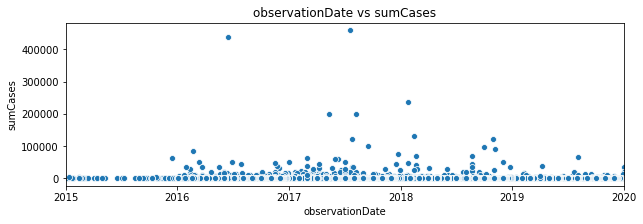

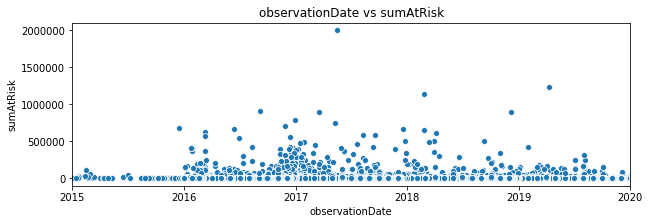

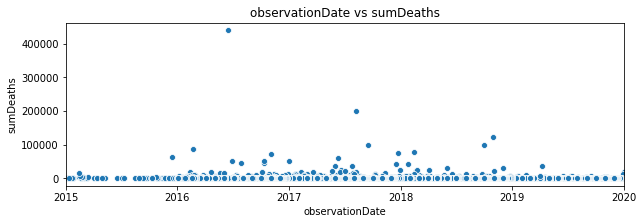

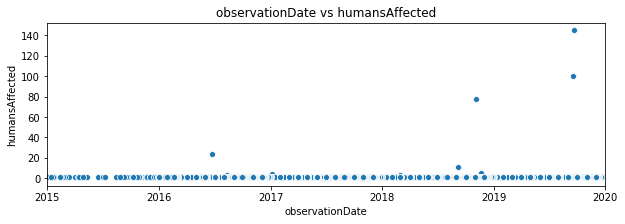

In [108]:
plt.figure(figsize=(10,3))
scatterplot = sns.scatterplot(x=outbreaks['observationDate'], y=outbreaks['sumCases'])
scatterplot.set_xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2020-01-01'))
plt.title('observationDate vs sumCases')
plt.show()

plt.figure(figsize=(10,3))
scatterplot = sns.scatterplot(x=outbreaks['observationDate'], y=outbreaks['sumAtRisk'])
scatterplot.set_xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2020-01-01'))
plt.title('observationDate vs sumAtRisk')
plt.show()

plt.figure(figsize=(10,3))
scatterplot = sns.scatterplot(x=outbreaks['observationDate'], y=outbreaks['sumDeaths'])
scatterplot.set_xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2020-01-01'))
plt.title('observationDate vs sumDeaths')
plt.show()

plt.figure(figsize=(10,3))
scatterplot = sns.scatterplot(x=outbreaks['observationDate'], y=outbreaks['humansAffected'])
scatterplot.set_xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2020-01-01'))
plt.title('observationDate vs humansAffected')
plt.show()

## Diseases

In [73]:
print(outbreaks.disease.value_counts())

# creating a dataframe including the eight most common diseases (diseases that showed up over 100 times)
top8_diseases = outbreaks[(outbreaks['Influenza - Avian'] == 1) | (outbreaks['Bluetongue'] == 1) |
                          (outbreaks['African swine fever'] == 1) | (outbreaks['Lumpy skin disease'] == 1)|
                          (outbreaks['MERS-CoV '] == 1) | (outbreaks['Foot and mouth disease'] == 1)|
                          (outbreaks['Newcastle disease'] == 1) | (outbreaks['Sheep pox and goat pox'] == 1)]

African swine fever                              12165
Influenza - Avian                                 7257
Bluetongue                                        3770
Lumpy skin disease                                2131
Foot and mouth disease                            1436
MERS-CoV                                           874
Classical swine fever                              572
Rabies                                             483
Newcastle disease                                  268
Peste des petits ruminants                         205
Sheep pox and goat pox                             187
Influenza - Equine                                 150
Anthrax                                            147
West Nile Fever                                    133
Rift Valley fever                                  107
Equine infectious anaemia                           44
African horse sickness                              22
Bovine spongiform encephalopathy                    13
Porcine re

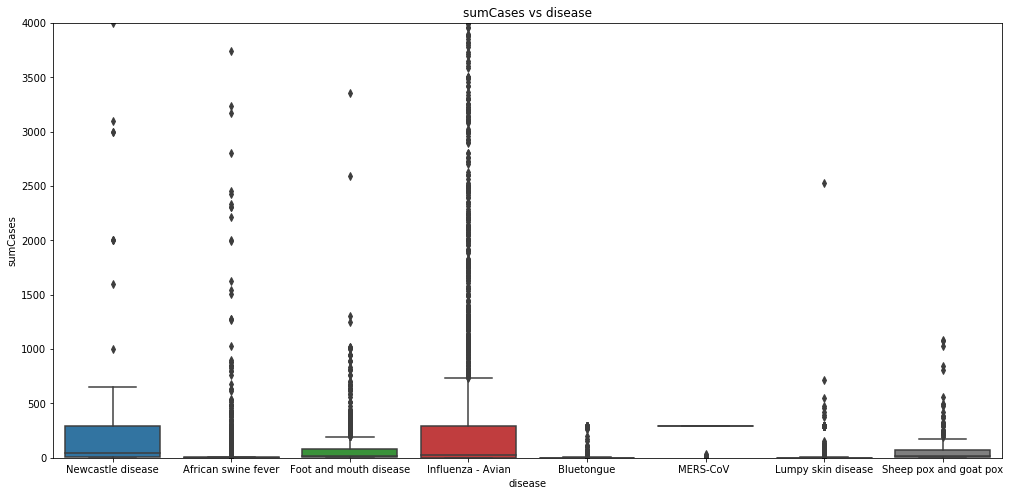

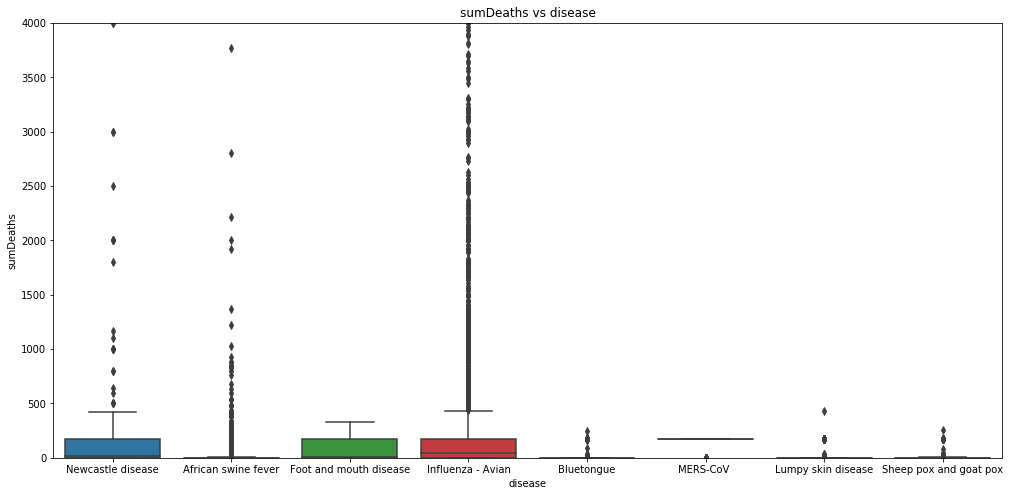

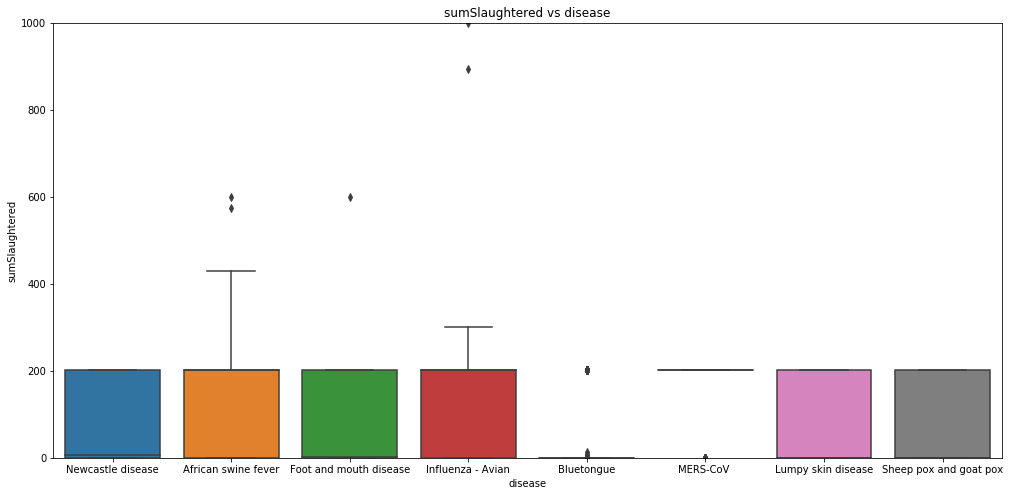

In [112]:
top8_diseases.head()

plt.figure(figsize=(17,8))
box = sns.boxplot(y='sumCases', x='disease', data=top8_diseases)
plt.title('sumCases vs disease')
box.set_ylim(0, 4000)
plt.show()

plt.figure(figsize=(17,8))
box = sns.boxplot(y='sumDeaths', x='disease', data=top8_diseases)
plt.title('sumDeaths vs disease')
box.set_ylim(0, 4000)
plt.show()

plt.figure(figsize=(17,8))
box = sns.boxplot(y='sumSlaughtered', x='disease', data=top8_diseases)
plt.title('sumSlaughtered vs disease')
box.set_ylim(0, 1000)
plt.show()


## Discrepancy Between Observation and Reporting Dates

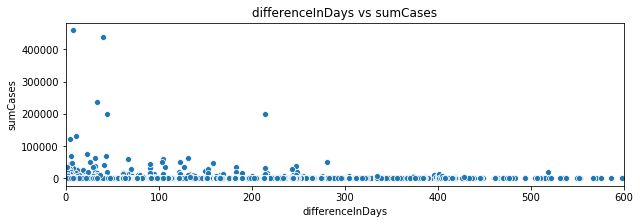

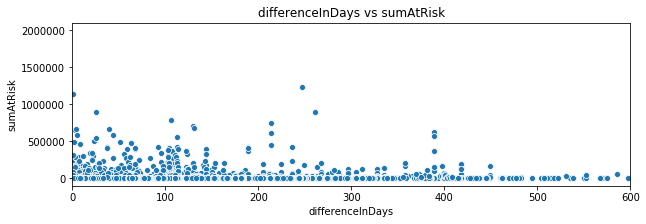

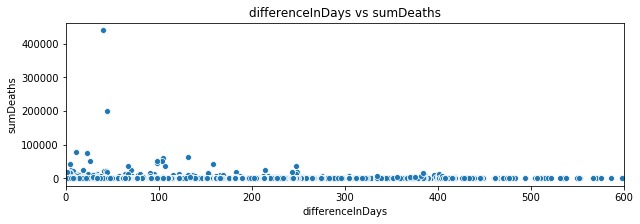

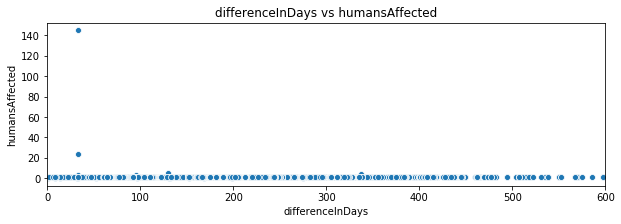

In [111]:
plt.figure(figsize=(10,3))
scatterplot = sns.scatterplot(x=outbreaks['differenceInDays'], y=outbreaks['sumCases'])
plt.title('differenceInDays vs sumCases')
scatterplot.set_xlim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
scatterplot = sns.scatterplot(x=outbreaks['differenceInDays'], y=outbreaks['sumAtRisk'])
plt.title('differenceInDays vs sumAtRisk')
scatterplot.set_xlim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
scatterplot = sns.scatterplot(x=outbreaks['differenceInDays'], y=outbreaks['sumDeaths'])
plt.title('differenceInDays vs sumDeaths')
scatterplot.set_xlim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
scatterplot = sns.scatterplot(x=outbreaks['differenceInDays'], y=outbreaks['humansAffected'])
plt.title('differenceInDays vs humansAffected')
scatterplot.set_xlim(0, 600)
plt.show()

## Regions

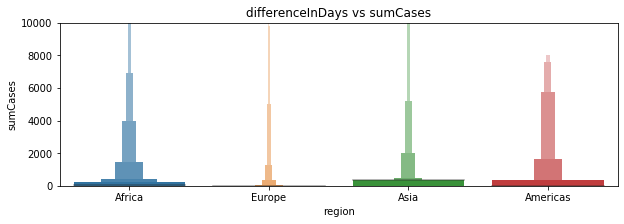

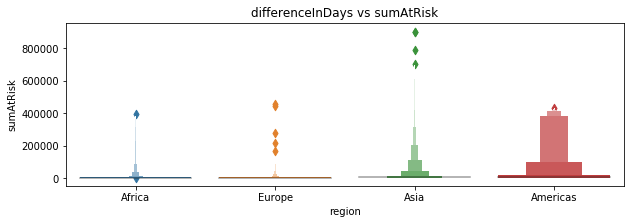

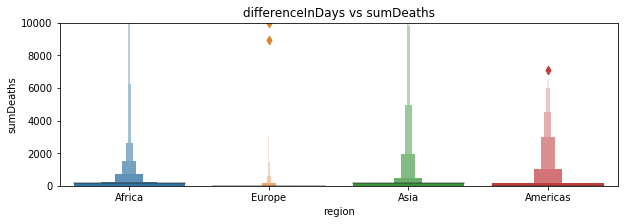

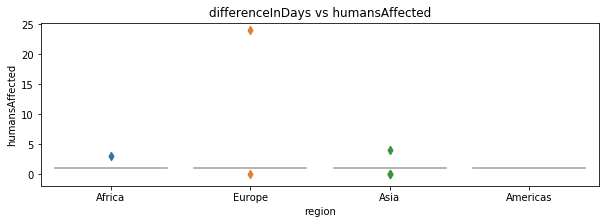

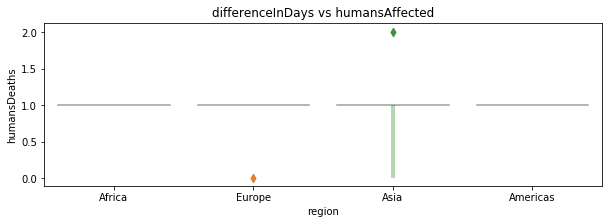

In [33]:
plt.figure(figsize=(10,3))
box = boxenplot = sns.boxenplot(x=outbreaks['region'], y=outbreaks['sumCases'])
plt.title('differenceInDays vs sumCases')
box.set_ylim(0, 10000)
plt.show()

plt.figure(figsize=(10,3))
boxenplot = sns.boxenplot(x=outbreaks['region'], y=outbreaks['sumAtRisk'])
plt.title('differenceInDays vs sumAtRisk')
# boxenplot.set_ylim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['region'], y=outbreaks['sumDeaths'])
plt.title('differenceInDays vs sumDeaths')
box.set_ylim(0, 10000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['region'], y=outbreaks['humansAffected'])
plt.title('differenceInDays vs humansAffected')
# box.set_ylim(0, 10)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['region'], y=outbreaks['humansDeaths'])
plt.title('differenceInDays vs humansAffected')
# box.set_ylim(0, 10)
plt.show()

# Checking Normality and Standardizing Features

In [78]:
floats = ['sumAtRisk', 'sumCases', 'sumDeaths', 'sumDestroyed', 'sumSlaughtered', 'humansAge', 'humansAffected', 
                 'humansDeaths', 'differenceInDays']
scaler = StandardScaler()

for feature in floats:
    col_name = str(feature+'_std')
    print(col_name)
    X[col_name] = scaler.fit_transform(X[feature].values.reshape(-1,1))

print('\n', X.columns)

sumAtRisk_std
sumCases_std
sumDeaths_std
sumDestroyed_std
sumSlaughtered_std
humansAge_std
humansAffected_std
humansDeaths_std
differenceInDays_std

 Index(['sumAtRisk', 'sumCases', 'sumDeaths', 'sumDestroyed', 'sumSlaughtered',
       'humansAffected', 'humansDeaths', 'humansAge', 'differenceInDays',
       'observationYear',
       ...
       'mammals', 'sumAtRisk_std', 'sumCases_std', 'sumDeaths_std',
       'sumDestroyed_std', 'sumSlaughtered_std', 'humansAge_std',
       'humansAffected_std', 'humansDeaths_std', 'differenceInDays_std'],
      dtype='object', length=281)


In [79]:
features_to_test = X[['sumAtRisk', 'sumCases', 'sumDeaths', 'sumDestroyed', 'sumSlaughtered', 'humansAge',
                             'humansAffected', 'humansDeaths', 'differenceInDays']]
for feat in features_to_test:
    jb_stats = stats.jarque_bera(X[feat])
    norm_stats = stats.normaltest(X[feat])
    
    print("Testing for normality on {}:".format(feat))
    print('Jarque-Bera test statistics for', feat, 'is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
    print('Normality test statistics for', feat, 'is {0} and p value is {1}\n'.format(norm_stats[0], norm_stats[1]))


Testing for normality on sumAtRisk:
Jarque-Bera test statistics for sumAtRisk is 39516741.77269033 and p value is 0.0
Normality test statistics for sumAtRisk is 11690.47480508059 and p value is 0.0

Testing for normality on sumCases:
Jarque-Bera test statistics for sumCases is 160812336.51514757 and p value is 0.0
Normality test statistics for sumCases is 14031.28077725313 and p value is 0.0

Testing for normality on sumDeaths:
Jarque-Bera test statistics for sumDeaths is 754535466.9971342 and p value is 0.0
Normality test statistics for sumDeaths is 16330.434421734226 and p value is 0.0

Testing for normality on sumDestroyed:
Jarque-Bera test statistics for sumDestroyed is 161248090.7316043 and p value is 0.0
Normality test statistics for sumDestroyed is 14096.971838778394 and p value is 0.0

Testing for normality on sumSlaughtered:
Jarque-Bera test statistics for sumSlaughtered is 159713480.6743164 and p value is 0.0
Normality test statistics for sumSlaughtered is 14359.432780407365 

In [80]:
standardized_features = X[['sumAtRisk_std', 'sumCases_std', 'sumDeaths_std', 'sumDestroyed_std', 'sumSlaughtered_std',
                      'humansAge_std', 'humansAffected_std', 'humansDeaths_std', 'differenceInDays_std']]
for feat in standardized_features:
    jb_stats = stats.jarque_bera(X[feat])
    norm_stats = stats.normaltest(X[feat])
    
    print("Testing for normality on {}:".format(feat))
    print('Jarque-Bera test statistics for', feat, 'is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
    print('Normality test statistics for', feat, 'is {0} and p value is {1}\n'.format(norm_stats[0], norm_stats[1]))

Testing for normality on sumAtRisk_std:
Jarque-Bera test statistics for sumAtRisk_std is 39516741.77269032 and p value is 0.0
Normality test statistics for sumAtRisk_std is 11690.47480508059 and p value is 0.0

Testing for normality on sumCases_std:
Jarque-Bera test statistics for sumCases_std is 160812336.5151475 and p value is 0.0
Normality test statistics for sumCases_std is 14031.28077725313 and p value is 0.0

Testing for normality on sumDeaths_std:
Jarque-Bera test statistics for sumDeaths_std is 754535466.997135 and p value is 0.0
Normality test statistics for sumDeaths_std is 16330.434421734226 and p value is 0.0

Testing for normality on sumDestroyed_std:
Jarque-Bera test statistics for sumDestroyed_std is 161248090.73160437 and p value is 0.0
Normality test statistics for sumDestroyed_std is 14096.971838778394 and p value is 0.0

Testing for normality on sumSlaughtered_std:
Jarque-Bera test statistics for sumSlaughtered_std is 159713480.67431623 and p value is 0.0
Normality t

In [81]:
corr_mat = X.corr().loc[:, ['humansDeaths_std']].abs().sort_values(by='humansDeaths_std', ascending=False)
corr_mat[:70]

,humansDeaths_std
humansDeaths,1.000000
humansDeaths_std,1.000000
humansAffected,0.946065
humansAffected_std,0.946065
sumAtRisk,0.344606
sumAtRisk_std,0.344606
Poland,0.329941
Europe,0.225870
African swine fever,0.217183
Romania,0.203732


# Visualizations with Dimensionality Reduction

## PCA

The best clustering seen with PCA is when 

In [82]:
# PCA with all variables

X_all = X.drop(columns = ['sumAtRisk', 'sumCases', 'sumDeaths', 'sumDestroyed', 'sumSlaughtered', 'humansAge', 'humansAffected', 
                 'humansDeaths', 'differenceInDays'])
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)
print(pca.explained_variance_ratio_)

pca_80 = PCA(n_components=0.80)
pca_components_80= pca_80.fit_transform(X_all)
print(pca_80.explained_variance_ratio_)


[0.72926134 0.12424225]
[0.72926134 0.12424225]


Cluster Graph with PCA 


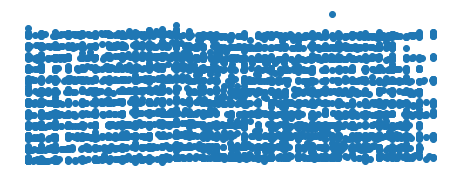

In [83]:
print('Cluster Graph with PCA ')
plt.figure(figsize=(8,3))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

First two PCA components:  [0.88679501 0.03031416]
PCA components for 80% of variance:  [0.88679501]
Cluster Graph with PCA 


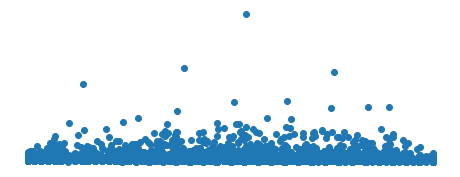

In [88]:
# PCA for features with greater than 0.01 absolute correlation with potential target

X_hd = X[['humansDeaths_std', 'humansAffected_std','sumAtRisk_std', 'Poland','Europe','sumDestroyed_std',
          'African swine fever','Romania', '8', 'France','wild', 'domestic','Bluetongue', 'birds','Africa',
                  'mammals','Asia','sumSlaughtered_std', 'Foot and mouth disease','H5N3 HPAI', 'unspecified',
          'Influenza - Avian', 'Albania','H7N9 LPAI','Americas','UnknownSerotypes','Newcastle disease',
          'O','4', 'Serbia','Israel','Latvia', 'H5N1 HPAI', 'observationFirstHalfMonth',
        'Anthrax','Sheep pox and goat pox','Mongolia','H5N8 HPAI','West Nile Fever','observationDay', 'South Africa',
        'OIE','Lumpy skin disease', 'Greece','Ukraine','H5N2 LPAI','Centroid Locality','Rabies','SAT2',
         'Taiwan (Province of China)', 'FAO Field Officer','Namibia', 'Zimbabwe', 'Belgium','sumCases_std']]


pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_hd)
print('First two PCA components: ', pca.explained_variance_ratio_)

pca_80 = PCA(n_components=0.80)
pca_components_80 = pca_80.fit_transform(X_hd)
print('PCA components for 80% of variance: ', pca_80.explained_variance_ratio_)


print('Cluster Graph with PCA ')
plt.figure(figsize=(8,3))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## TSNE with All Variables

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4709 samples in 0.083s...
[t-SNE] Computed neighbors for 4709 samples in 5.019s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4709
[t-SNE] Computed conditional probabilities for sample 2000 / 4709
[t-SNE] Computed conditional probabilities for sample 3000 / 4709
[t-SNE] Computed conditional probabilities for sample 4000 / 4709
[t-SNE] Computed conditional probabilities for sample 4709 / 4709
[t-SNE] Mean sigma: 1.175272
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.201263
[t-SNE] KL divergence after 300 iterations: 2.726968
Cluster Graph with t-SNE with Perplexity  10


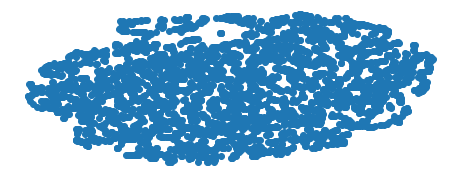

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 4709 samples in 0.086s...
[t-SNE] Computed neighbors for 4709 samples in 5.992s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4709
[t-SNE] Computed conditional probabilities for sample 2000 / 4709
[t-SNE] Computed conditional probabilities for sample 3000 / 4709
[t-SNE] Computed conditional probabilities for sample 4000 / 4709
[t-SNE] Computed conditional probabilities for sample 4709 / 4709
[t-SNE] Mean sigma: 1.348547
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.044144
[t-SNE] KL divergence after 300 iterations: 2.382987
Cluster Graph with t-SNE with Perplexity  20


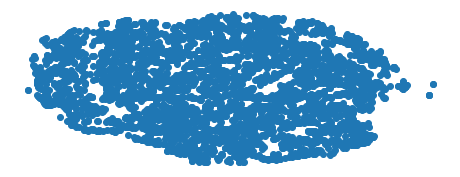

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4709 samples in 0.085s...
[t-SNE] Computed neighbors for 4709 samples in 6.626s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4709
[t-SNE] Computed conditional probabilities for sample 2000 / 4709
[t-SNE] Computed conditional probabilities for sample 3000 / 4709
[t-SNE] Computed conditional probabilities for sample 4000 / 4709
[t-SNE] Computed conditional probabilities for sample 4709 / 4709
[t-SNE] Mean sigma: 1.445651
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.485870
[t-SNE] KL divergence after 300 iterations: 2.152236
Cluster Graph with t-SNE with Perplexity  30


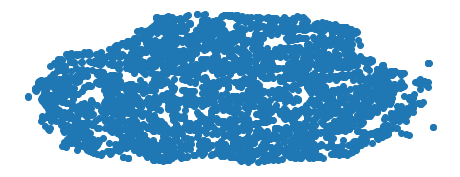

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4709 samples in 0.075s...
[t-SNE] Computed neighbors for 4709 samples in 6.034s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4709
[t-SNE] Computed conditional probabilities for sample 2000 / 4709
[t-SNE] Computed conditional probabilities for sample 3000 / 4709
[t-SNE] Computed conditional probabilities for sample 4000 / 4709
[t-SNE] Computed conditional probabilities for sample 4709 / 4709
[t-SNE] Mean sigma: 1.515864
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.885834
[t-SNE] KL divergence after 300 iterations: 1.982303
Cluster Graph with t-SNE with Perplexity  40


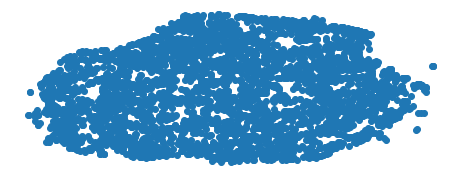

In [165]:
for perplexity in [10, 20, 30, 40]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300)
    tsne_results = tsne.fit_transform(X_all)
    print('Cluster Graph with t-SNE with Perplexity ', perplexity)
    plt.figure(figsize=(8,3))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

## TSNE with Top 50 Correlated Variables with humansDeaths

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 22583 samples in 0.357s...
[t-SNE] Computed neighbors for 22583 samples in 3.654s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22583
[t-SNE] Computed conditional probabilities for sample 2000 / 22583
[t-SNE] Computed conditional probabilities for sample 3000 / 22583
[t-SNE] Computed conditional probabilities for sample 4000 / 22583
[t-SNE] Computed conditional probabilities for sample 5000 / 22583
[t-SNE] Computed conditional probabilities for sample 6000 / 22583
[t-SNE] Computed conditional probabilities for sample 7000 / 22583
[t-SNE] Computed conditional probabilities for sample 8000 / 22583
[t-SNE] Computed conditional probabilities for sample 9000 / 22583
[t-SNE] Computed conditional probabilities for sample 10000 / 22583
[t-SNE] Computed conditional probabilities for sample 11000 / 22583
[t-SNE] Computed conditional probabilities for sample 12000 / 22583
[t-SNE] Computed conditional probabilities for sam

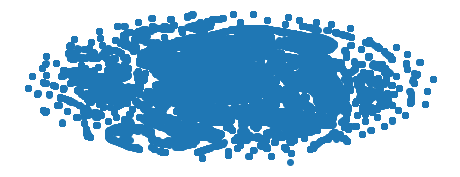

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 22583 samples in 0.386s...
[t-SNE] Computed neighbors for 22583 samples in 4.563s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22583
[t-SNE] Computed conditional probabilities for sample 2000 / 22583
[t-SNE] Computed conditional probabilities for sample 3000 / 22583
[t-SNE] Computed conditional probabilities for sample 4000 / 22583
[t-SNE] Computed conditional probabilities for sample 5000 / 22583
[t-SNE] Computed conditional probabilities for sample 6000 / 22583
[t-SNE] Computed conditional probabilities for sample 7000 / 22583
[t-SNE] Computed conditional probabilities for sample 8000 / 22583
[t-SNE] Computed conditional probabilities for sample 9000 / 22583
[t-SNE] Computed conditional probabilities for sample 10000 / 22583
[t-SNE] Computed conditional probabilities for sample 11000 / 22583
[t-SNE] Computed conditional probabilities for sample 12000 / 22583
[t-SNE] Computed conditional probabilities for sam

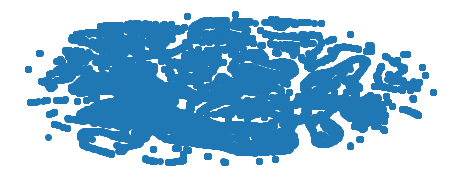

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 22583 samples in 0.347s...
[t-SNE] Computed neighbors for 22583 samples in 5.119s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22583
[t-SNE] Computed conditional probabilities for sample 2000 / 22583
[t-SNE] Computed conditional probabilities for sample 3000 / 22583
[t-SNE] Computed conditional probabilities for sample 4000 / 22583
[t-SNE] Computed conditional probabilities for sample 5000 / 22583
[t-SNE] Computed conditional probabilities for sample 6000 / 22583
[t-SNE] Computed conditional probabilities for sample 7000 / 22583
[t-SNE] Computed conditional probabilities for sample 8000 / 22583
[t-SNE] Computed conditional probabilities for sample 9000 / 22583
[t-SNE] Computed conditional probabilities for sample 10000 / 22583
[t-SNE] Computed conditional probabilities for sample 11000 / 22583
[t-SNE] Computed conditional probabilities for sample 12000 / 22583
[t-SNE] Computed conditional probabilities for sam

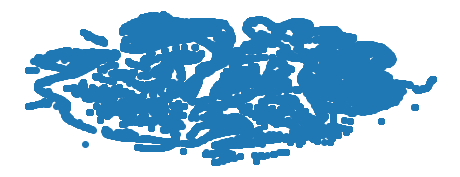

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 22583 samples in 0.295s...
[t-SNE] Computed neighbors for 22583 samples in 5.144s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22583
[t-SNE] Computed conditional probabilities for sample 2000 / 22583
[t-SNE] Computed conditional probabilities for sample 3000 / 22583
[t-SNE] Computed conditional probabilities for sample 4000 / 22583
[t-SNE] Computed conditional probabilities for sample 5000 / 22583
[t-SNE] Computed conditional probabilities for sample 6000 / 22583
[t-SNE] Computed conditional probabilities for sample 7000 / 22583
[t-SNE] Computed conditional probabilities for sample 8000 / 22583
[t-SNE] Computed conditional probabilities for sample 9000 / 22583
[t-SNE] Computed conditional probabilities for sample 10000 / 22583
[t-SNE] Computed conditional probabilities for sample 11000 / 22583
[t-SNE] Computed conditional probabilities for sample 12000 / 22583
[t-SNE] Computed conditional probabilities for sa

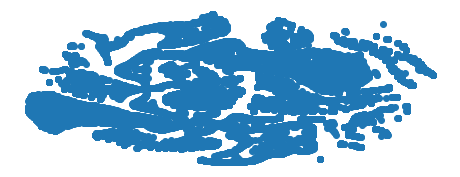

In [166]:
for perplexity in [10, 20, 30, 40]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300)
    tsne_results = tsne.fit_transform(X_hd)
    print('Cluster Graph with t-SNE with Perplexity ', perplexity)
    plt.figure(figsize=(8,3))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

## UMAP with All Features

UMAP with all features. 



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.p

UMAP for X_all with  5 neighbors and  0.05 minimum distance.


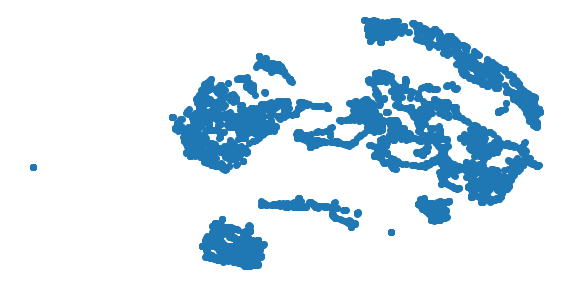

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_all with  5 neighbors and  0.1 minimum distance.


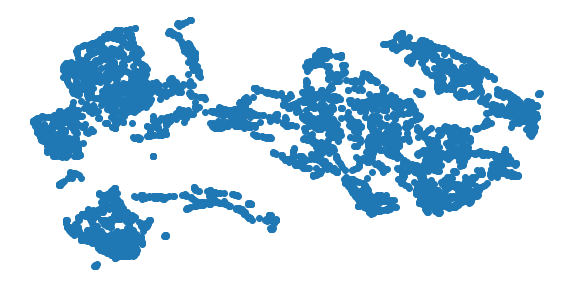

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_all with  5 neighbors and  0.25 minimum distance.


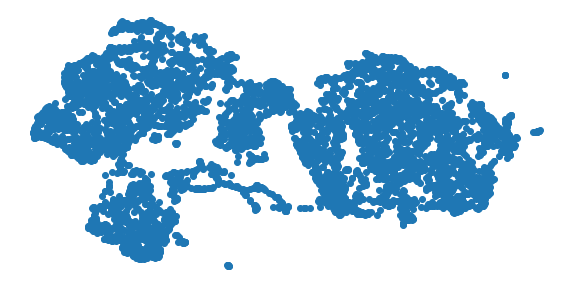

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_all with  10 neighbors and  0.05 minimum distance.


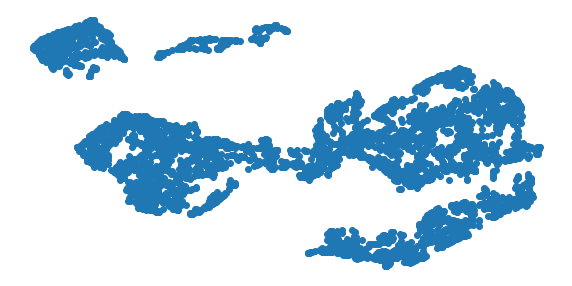

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_all with  10 neighbors and  0.1 minimum distance.


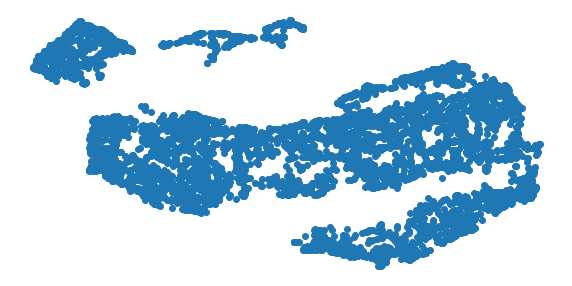

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_all with  10 neighbors and  0.25 minimum distance.


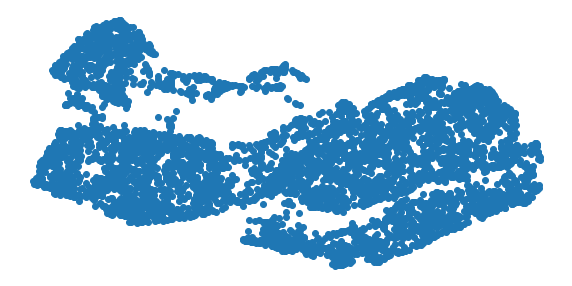

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_all with  25 neighbors and  0.05 minimum distance.


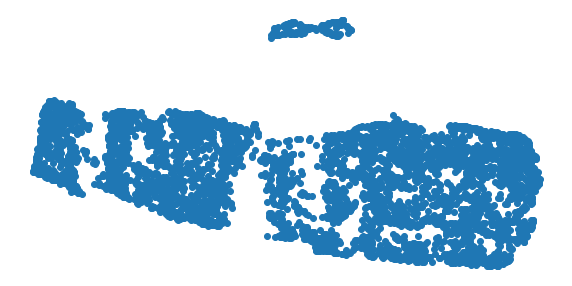

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_all with  25 neighbors and  0.1 minimum distance.


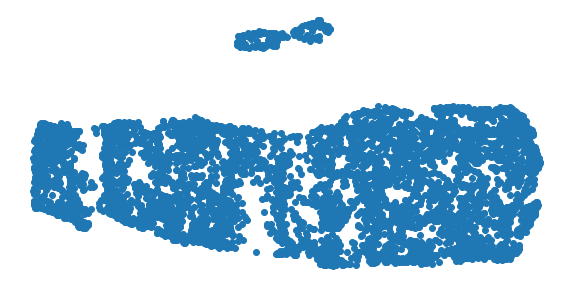

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_all with  25 neighbors and  0.25 minimum distance.


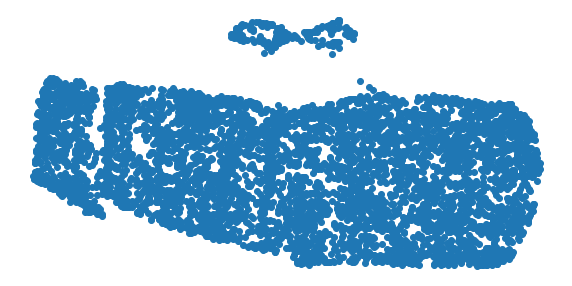

In [87]:
# UMAP with all features
print('UMAP with all features. \n')
for n_neighbors in [5, 10, 25]:
    for min_dist in [0.05, 0.1, 0.25]:
        umap_results = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist=min_dist,
                      metric='correlation').fit_transform(X_all)
        print('UMAP for X_all with ', n_neighbors, 'neighbors and ', min_dist, 'minimum distance.')
        plt.figure(figsize=(10,5))
        plt.scatter(umap_results[:, 0], umap_results[:, 1])
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()
        print('\n')

## UMAP with Features Highly Correlated with humansDeaths

UMAP with features highly correlated with humansDeaths. 



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 27 separate connected components using meta-embedding (experimental)
  n_components


UMAP for X_01hd with  5 neighbors and  0.05 minimum distance.


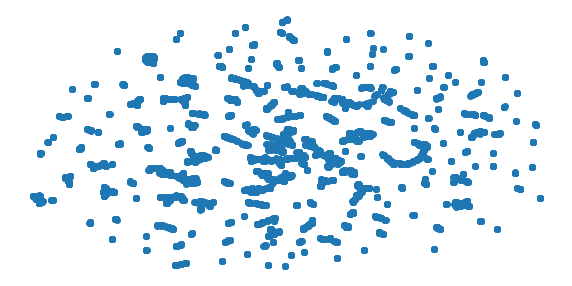

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 26 separate connected components using meta-embedding (experimental)
  n_components


UMAP for X_01hd with  5 neighbors and  0.1 minimum distance.


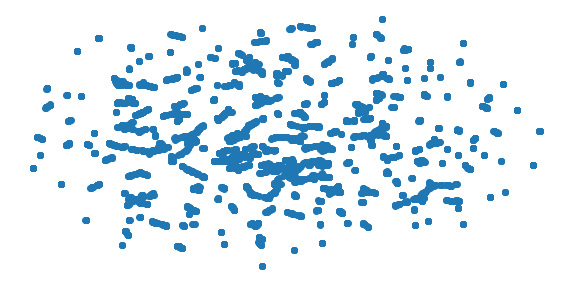

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 31 separate connected components using meta-embedding (experimental)
  n_components


UMAP for X_01hd with  5 neighbors and  0.25 minimum distance.


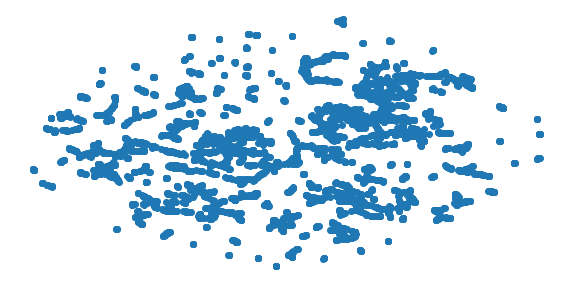

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


UMAP for X_01hd with  10 neighbors and  0.05 minimum distance.


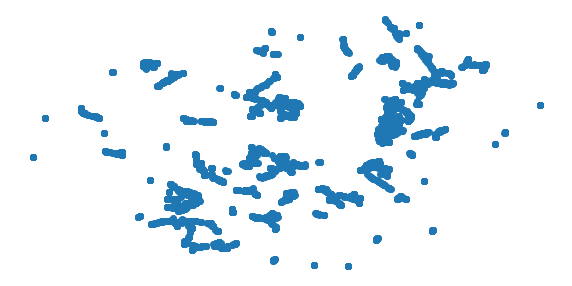

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


UMAP for X_01hd with  10 neighbors and  0.1 minimum distance.


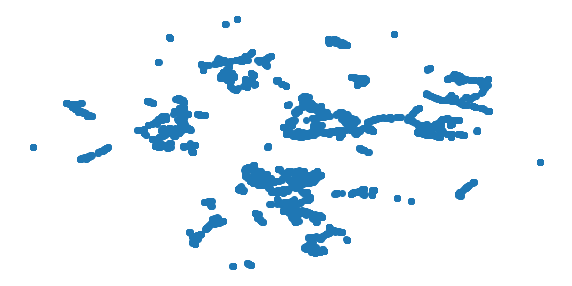

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


UMAP for X_01hd with  10 neighbors and  0.25 minimum distance.


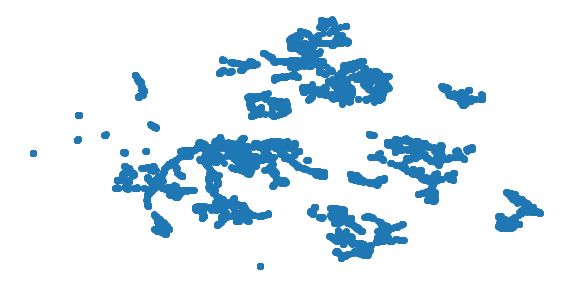

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_01hd with  25 neighbors and  0.05 minimum distance.


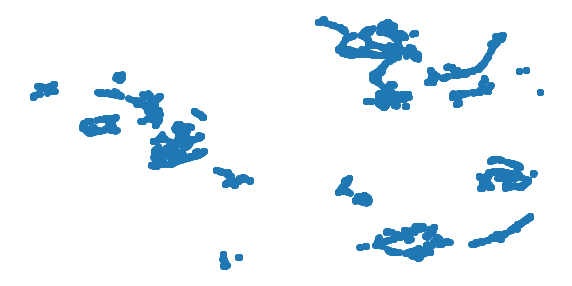

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_01hd with  25 neighbors and  0.1 minimum distance.


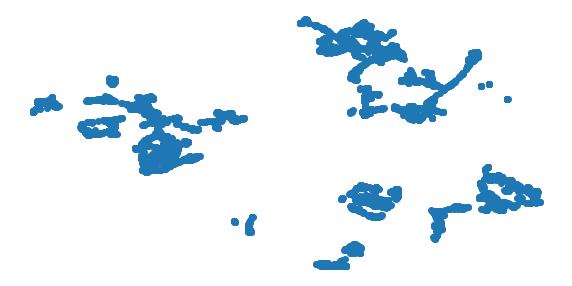

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_01hd with  25 neighbors and  0.25 minimum distance.


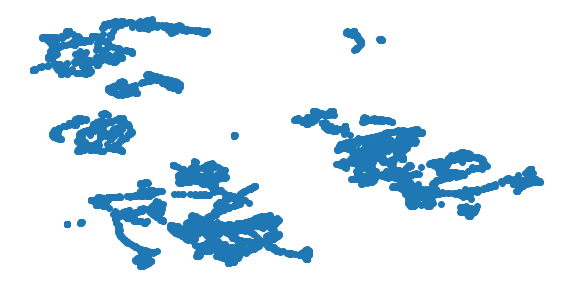

In [89]:
print('UMAP with features highly correlated with humansDeaths. \n')
for n_neighbors in [5, 10, 25]:
    for min_dist in [0.05, 0.1, 0.25]:
        umap_results = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist=min_dist,
                      metric='correlation').fit_transform(X_hd)
        print('UMAP for X_01hd with ', n_neighbors, 'neighbors and ', min_dist, 'minimum distance.')
        plt.figure(figsize=(10,5))
        plt.scatter(umap_results[:, 0], umap_results[:, 1])
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()
        print('\n')
        


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP with  30 neighbors and  0.1 minimum distance.


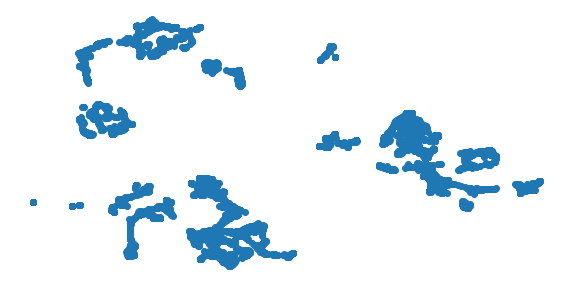

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP with  30 neighbors and  0.5 minimum distance.


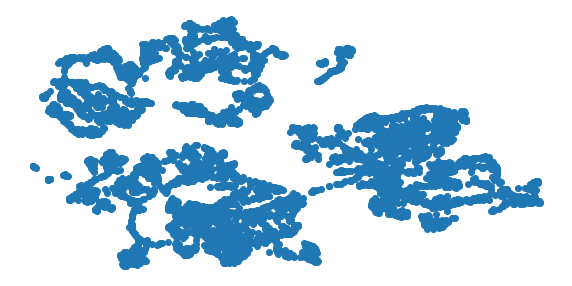

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP with  50 neighbors and  0.1 minimum distance.


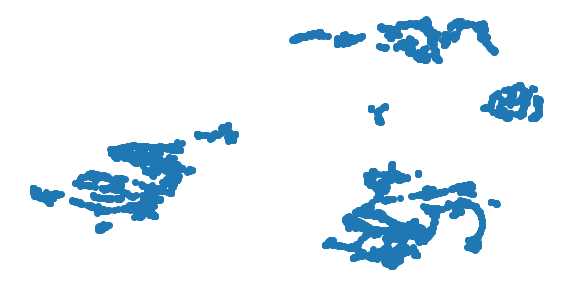

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP with  50 neighbors and  0.5 minimum distance.


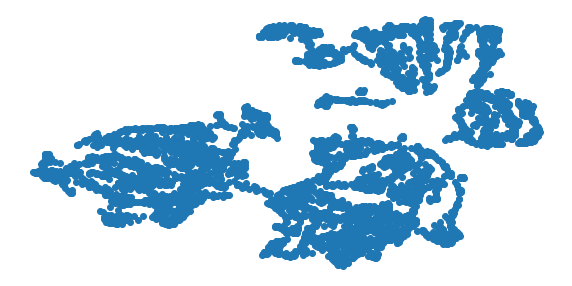

In [91]:
# UMAP with >0.01 correlation
for n_neighbors in [30, 50]:
    for min_dist in [0.1, 0.5]:
        umap_results = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist=min_dist,
                      metric='correlation').fit_transform(X_hd)
        print('UMAP with ', n_neighbors, 'neighbors and ', min_dist, 'minimum distance.')
        plt.figure(figsize=(10,5))
        plt.scatter(umap_results[:, 0], umap_results[:, 1])
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()
        print('\n')

## LLE 

LLE with  5 neighbors and two components.


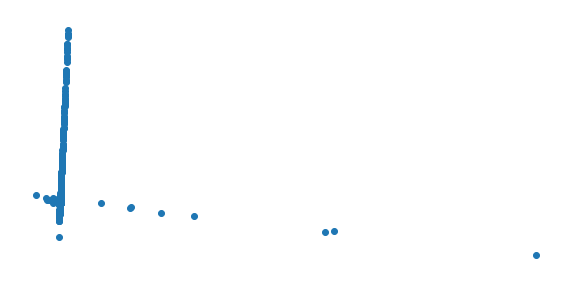



LLE with  10 neighbors and two components.


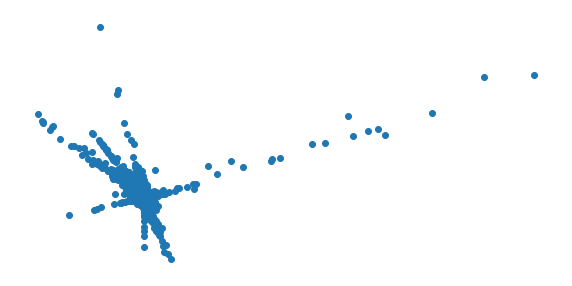



LLE with  25 neighbors and two components.


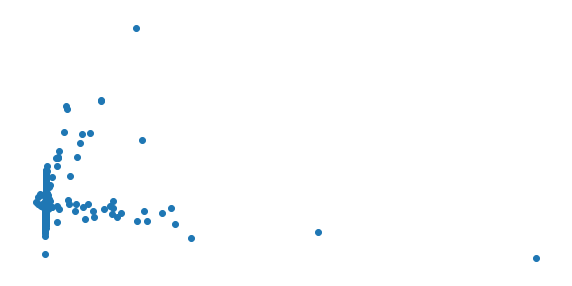



LLE with  50 neighbors and two components.


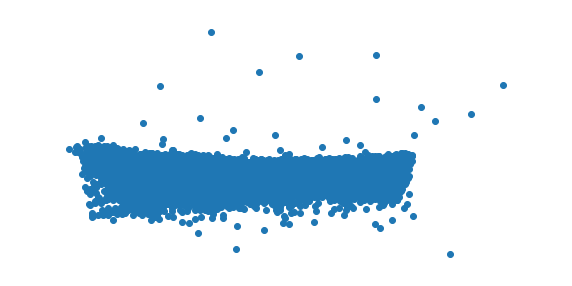

In [100]:
# LLE with all features
for n_neighbors in [5, 10, 25, 50]:
    lle_results = LocallyLinearEmbedding(n_components=2, 
                    n_neighbors=n_neighbors,
                    eigen_solver='dense').fit_transform(X_all)
    print('LLE with ', n_neighbors, 'neighbors and two components.')
    plt.figure(figsize=(10,5))
    plt.scatter(lle_results[:, 0], lle_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    print('\n')


LLE with  5 neighbors and two components.


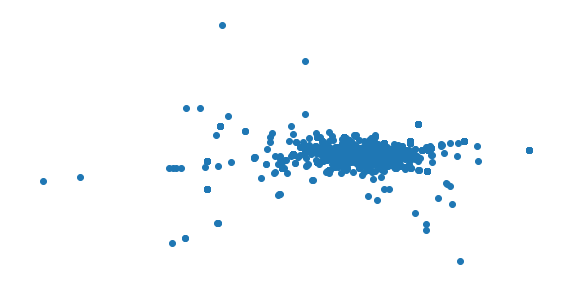



LLE with  10 neighbors and two components.


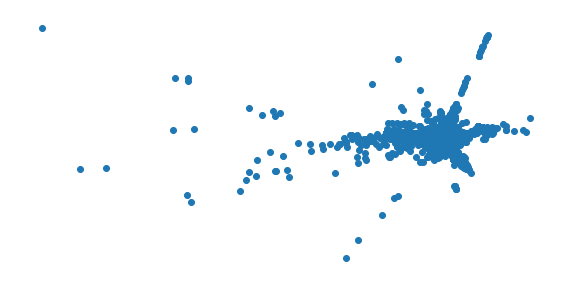



LLE with  25 neighbors and two components.


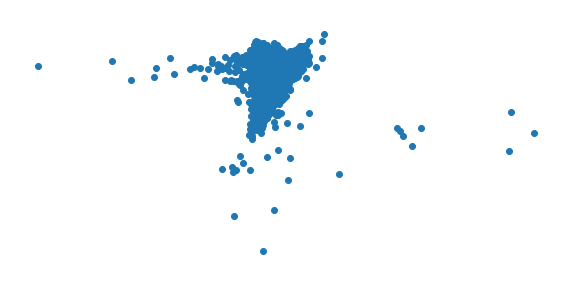



LLE with  50 neighbors and two components.


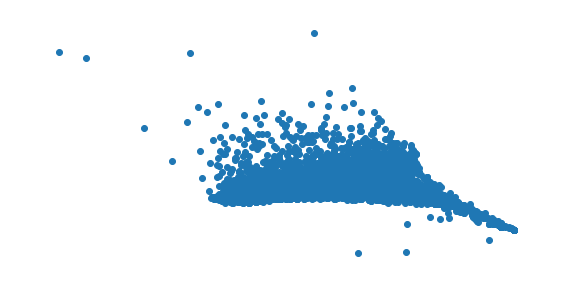

In [101]:
# LLE with all float features
for n_neighbors in [5, 10, 25, 50]:
    lle_results = LocallyLinearEmbedding(n_components=2, 
                    n_neighbors=n_neighbors,
                    eigen_solver='dense').fit_transform(X_hd)
    print('LLE with ', n_neighbors, 'neighbors and two components.')
    plt.figure(figsize=(10,5))
    plt.scatter(lle_results[:, 0], lle_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    print('\n')

    For your third capstone, you’ll complete an unsupervised learning project. You can choose your own research question or choose from one below.

Go out and find a dataset of interest. It could be one that helps you work on one of our recommended research questions, or any other dataset that addresses an unsupervised learning question of your own.

Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

You should try several different approaches and really work to tune a variety of models before choosing what you consider to be the best performer.

Things to keep in mind: how do clustering and modeling compare? What are the advantages of each? Why would you want to use one over the other?

Be prepared to talk about:

- Your end-user and the value your project provides to them.
- Quantifiable results based on the research you’ve conducted.
- The visuals you chose and what they represent for your research.
- Next steps you'd take to expand on your work.
- A specified research question your model addresses.
- How you chose your model specification and what alternatives you compared it to.
- The practical uses of your model for an audience of interest.
- Any weak points or shortcomings of your model.


In [185]:
import operator

def get_pvalue_2clusters(variables):
    variables_pvalues = {}
    for variable in variables:
        t, pvalue = stats.ttest_ind(group_0[[variable]], group_1[[variable]])
        variables_pvalues[variable] = pvalue
    sorted_variables_pvalues = sorted(variables_pvalues.items(), key=operator.itemgetter(1))
    for variable, pvalue in sorted_variables_pvalues:
        print(variable, ':', pvalue)

def get_pvalue_3clusters(variables):
    variables_pvalues = {}
    for variable in variables:
        stat, pvalue = stats.f_oneway(group_0[[variable]], group_1[[variable]], group_2[[variable]])
        variables_pvalues[variable] = pvalue
    sorted_variables_pvalues = sorted(variables_pvalues.items(), key=operator.itemgetter(1))
    for variable, pvalue in sorted_variables_pvalues:
        print(variable, ':', pvalue)


# Clustering

## K-Means with PCA Components for all features

48.9 ms ± 3.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
79.5 ms ± 451 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
124 ms ± 2.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
156 ms ± 693 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
196 ms ± 5.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
223 ms ± 2.37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
200 ms ± 829 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
219 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
268 ms ± 5.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
274 ms ± 1.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
332 ms ± 1.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


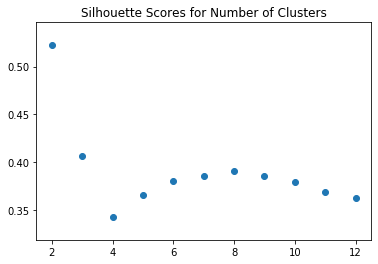

Best Silhouette score is 0.5221044113816659 with 2 clusters. 
Best Davies Bouldin score:  0.6971336685059667
47.1 ms ± 365 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


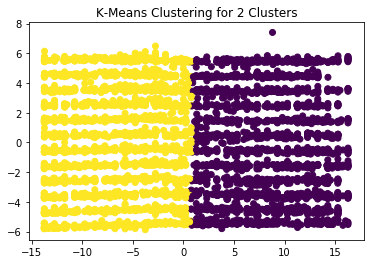

In [93]:
# K-means with PCA with all variables, including humansDeaths

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
silhouettes_kpca = []
silhouettes_kpca_dict = {} # silhoutte scores are keys, clusters are values
dbs_kpca = []

# looping through cluster numbers to find the best cluster
for cluster in clusters:
    
    labels = KMeans(n_clusters=cluster, random_state=123).fit_predict(pca_components)
    kmeans_cluster = KMeans(n_clusters=cluster, random_state=123)
    %timeit kmeans_cluster.fit(pca_components)
    y_pred = kmeans_cluster.predict(pca_components)
    silhouette = metrics.silhouette_score(pca_components, labels, metric='euclidean', sample_size=5000)
    silhouettes_kpca.append(silhouette)
    silhouettes_kpca_dict[silhouette] = cluster
    db = metrics.davies_bouldin_score(pca_components, labels)
    dbs_kpca.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of Clusters')  
plt.scatter(list(silhouettes_kpca_dict.values()), list(silhouettes_kpca_dict.keys()))
plt.show()


print('Best Silhouette score is {} with {} clusters. '.format(max(silhouettes_kpca_dict.keys()), silhouettes_kpca_dict[max(silhouettes_kpca_dict.keys())]))
print('Best Davies Bouldin score: ', min(dbs_kpca))

# plotting the clusters with the best silhouette score
best_cluster = silhouettes_kpca_dict[max(silhouettes_kpca_dict.keys())]
labels = KMeans(n_clusters=best_cluster, random_state=123).fit_predict(pca_components)
kmeans_cluster = KMeans(n_clusters=best_cluster, random_state=123)
%timeit kmeans_cluster.fit(pca_components)
y_pred = kmeans_cluster.predict(pca_components)

plt.title('K-Means Clustering for {} Clusters'.format(silhouettes_kpca_dict[max(silhouettes_kpca_dict.keys())]))
plt.scatter(pca_components[:,0], pca_components[:,1], c=y_pred)
plt.show()

## K-Means using PCA for features with high correlations with humansDeaths

48.3 ms ± 3.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
71.6 ms ± 436 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
86.5 ms ± 522 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
106 ms ± 478 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
112 ms ± 2.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
139 ms ± 7.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
156 ms ± 19.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
163 ms ± 647 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
172 ms ± 2.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
190 ms ± 720 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
185 ms ± 4.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


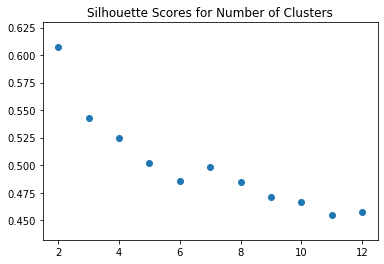

Best Silhouette score is 0.6069751640047465 with 2 clusters. 
Best Davies Bouldin score:  0.5296467623401556
46.8 ms ± 393 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


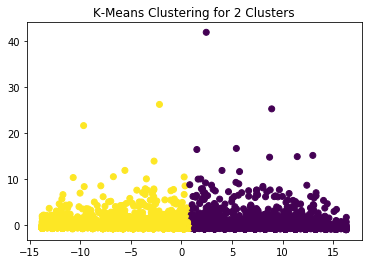

In [94]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_hd)
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
silhouettes_kpca = []
silhouettes_kpca_dict = {} # silhoutte scores are keys, clusters are values
dbs_kpca = []

# looping through cluster numbers to find the best cluster
for cluster in clusters:
    
    labels = KMeans(n_clusters=cluster, random_state=123).fit_predict(pca_components)
    kmeans_cluster = KMeans(n_clusters=cluster, random_state=123)
    %timeit kmeans_cluster.fit(pca_components)
    y_pred = kmeans_cluster.predict(pca_components)
    silhouette = metrics.silhouette_score(pca_components, labels, metric='euclidean', sample_size=5000)
    silhouettes_kpca.append(silhouette)
    silhouettes_kpca_dict[silhouette] = cluster
    db = metrics.davies_bouldin_score(pca_components, labels)
    dbs_kpca.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of Clusters')  
plt.scatter(list(silhouettes_kpca_dict.values()), list(silhouettes_kpca_dict.keys()))
plt.show()


print('Best Silhouette score is {} with {} clusters. '.format(max(silhouettes_kpca_dict.keys()), silhouettes_kpca_dict[max(silhouettes_kpca_dict.keys())]))
print('Best Davies Bouldin score: ', min(dbs_kpca))

# plotting the clusters with the best silhouette score
best_cluster = silhouettes_kpca_dict[max(silhouettes_kpca_dict.keys())]
labels = KMeans(n_clusters=best_cluster, random_state=123).fit_predict(pca_components)
kmeans_cluster = KMeans(n_clusters=best_cluster, random_state=123)
%timeit kmeans_cluster.fit(pca_components)
y_pred = kmeans_cluster.predict(pca_components)

plt.title('K-Means Clustering for {} Clusters'.format(silhouettes_kpca_dict[max(silhouettes_kpca_dict.keys())]))
plt.scatter(pca_components[:,0], pca_components[:,1], c=y_pred)
plt.show()

## K-Means using UMAP for all features

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


56 ms ± 525 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
118 ms ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
166 ms ± 24.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
164 ms ± 31.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
135 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
181 ms ± 29.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
217 ms ± 5.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
234 ms ± 33.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
258 ms ± 12.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
270 ms ± 941 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
311 ms ± 23.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


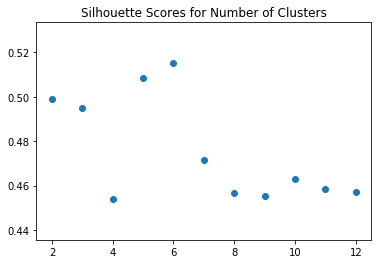

Best Silhouette score is 0.515267014503479 with 6 clusters. 
Best Davies Bouldin score:  0.661109078495451
133 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


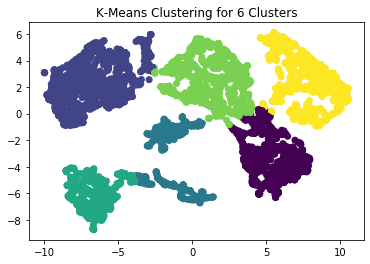

In [96]:
# K-means with UMAP with all variables, including humansDeaths
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_all)
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
silhouettes_kumap = []
silhouettes_kumap_dict = {} # silhoutte scores are keys, clusters are values
dbs_kumap = []

# looping through cluster numbers to find the best cluster
for cluster in clusters:
    labels = KMeans(n_clusters=cluster, random_state=123).fit_predict(umap_results)
    kmeans_cluster = KMeans(n_clusters=cluster, random_state=123)
    %timeit kmeans_cluster.fit(umap_results)
    y_pred = kmeans_cluster.predict(umap_results)
    silhouette = metrics.silhouette_score(umap_results, labels, metric='euclidean', sample_size=5000)
    silhouettes_kumap.append(silhouette)
    silhouettes_kumap_dict[silhouette] = cluster
    db = metrics.davies_bouldin_score(umap_results, labels)
    dbs_kumap.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of Clusters')  
plt.scatter(list(silhouettes_kumap_dict.values()), list(silhouettes_kumap_dict.keys()))
plt.show()


print('Best Silhouette score is {} with {} clusters. '.format(max(silhouettes_kumap_dict.keys()), silhouettes_kumap_dict[max(silhouettes_kumap_dict.keys())]))
print('Best Davies Bouldin score: ', min(dbs_kumap))

# plotting the clusters with the best silhouette score
best_cluster = silhouettes_kumap_dict[max(silhouettes_kumap_dict.keys())]
labels = KMeans(n_clusters=best_cluster, random_state=123).fit_predict(umap_results)
kmeans_cluster = KMeans(n_clusters=best_cluster, random_state=123)
%timeit kmeans_cluster.fit(umap_results)
y_pred = kmeans_cluster.predict(umap_results)

plt.title('K-Means Clustering for {} Clusters'.format(silhouettes_kumap_dict[max(silhouettes_kumap_dict.keys())]))
plt.scatter(umap_results[:,0], umap_results[:,1], c=y_pred)
plt.show()

## K-Means using UMAP for features with high correlations with humansDeaths

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


51.5 ms ± 303 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
51.8 ms ± 1.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
103 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
105 ms ± 4.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
117 ms ± 1.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
138 ms ± 7.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
146 ms ± 5.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
184 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
264 ms ± 33.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
271 ms ± 4.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
284 ms ± 1.74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


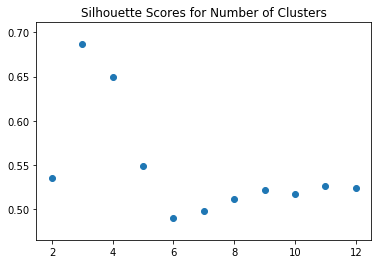

Best Silhouette score is 0.686378538608551 with 3 clusters. 
Best Davies Bouldin score:  0.47170385864935555
68.7 ms ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


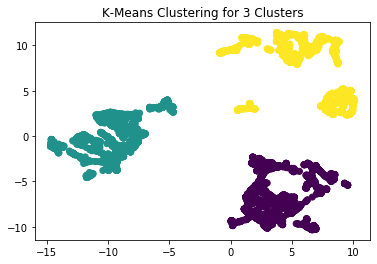

In [179]:
# K-means with UMAP with humansDeaths features
umap_results = umap.UMAP(n_neighbors=50,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_hd)
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
silhouettes_kumap = []
silhouettes_kumap_dict = {} # silhoutte scores are keys, clusters are values
dbs_kumap = []

# looping through cluster numbers to find the best cluster
for cluster in clusters:
    labels = KMeans(n_clusters=cluster, random_state=123).fit_predict(umap_results)
    kmeans_cluster = KMeans(n_clusters=cluster, random_state=123)
    %timeit kmeans_cluster.fit(umap_results)
    y_pred = kmeans_cluster.predict(umap_results)
    silhouette = metrics.silhouette_score(umap_results, labels, metric='euclidean', sample_size=5000)
    silhouettes_kumap.append(silhouette)
    silhouettes_kumap_dict[silhouette] = cluster
    db = metrics.davies_bouldin_score(umap_results, labels)
    dbs_kumap.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of Clusters')  
plt.scatter(list(silhouettes_kumap_dict.values()), list(silhouettes_kumap_dict.keys()))
plt.show()


print('Best Silhouette score is {} with {} clusters. '.format(max(silhouettes_kumap_dict.keys()), silhouettes_kumap_dict[max(silhouettes_kumap_dict.keys())]))
print('Best Davies Bouldin score: ', min(dbs_kumap))

# plotting the clusters with the best silhouette score
best_cluster = silhouettes_kumap_dict[max(silhouettes_kumap_dict.keys())]
labels = KMeans(n_clusters=best_cluster, random_state=123).fit_predict(umap_results)
kmeans_cluster = KMeans(n_clusters=best_cluster, random_state=123)
%timeit kmeans_cluster.fit(umap_results)
y_pred = kmeans_cluster.predict(umap_results)

plt.title('K-Means Clustering for {} Clusters'.format(silhouettes_kumap_dict[max(silhouettes_kumap_dict.keys())]))
plt.scatter(umap_results[:,0], umap_results[:,1], c=y_pred)
plt.show()

# P-Values for Labeled Features

In [226]:
# K-means with humansDeaths features

umap_results = umap.UMAP(n_neighbors=50,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_hd)

labels = KMeans(n_clusters=3, random_state=123).fit_predict(umap_results)
print(X.shape)
print(len(labels))
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))
X['X_hd_umap_kmeans_clusters'] = labels
group_0 = X[X['X_hd_umap_kmeans_clusters'] == 0]
group_1 = X[X['X_hd_umap_kmeans_clusters'] == 1]
group_2 = X[X['X_hd_umap_kmeans_clusters'] == 2]

get_pvalue_3clusters(X.columns)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


(5831, 286)
5831
{0: 2002, 1: 2054, 2: 1775}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:3349: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Asia : [0.]
Europe : [0.]
African swine fever : [0.]
Foot and mouth disease : [0.]
Influenza - Avian : [0.]
H5N8 HPAI : [0.]
UnknownSerotypes : [0.]
birds : [0.]
mammals : [0.]
X_hd_pca_clusters : [0.]
X_hd_umap_clusters : [0.]
X_hd_umap_agg_clusters : [0.]
X_hd_umap_gmm_clusters : [0.]
X_hd_umap_kmeans_clusters : [0.]
unspecified : [1.4061878e-299]
Africa : [4.74539931e-224]
H5N1 HPAI : [1.62779158e-183]
O : [1.84211884e-177]
wild : [2.22630721e-159]
Bluetongue : [2.65487053e-143]
MERS-CoV  : [6.47517011e-127]
humansDeaths : [7.2581815e-116]
humansDeaths_std : [7.2581815e-116]
humansAffected : [2.19487491e-108]
humansAffected_std : [2.19487491e-108]
OIE : [6.23894478e-101]
H5N6 HPAI : [1.26298191e-92]
observationYear : [1.5942185e-91]
Saudi Arabia : [2.60586857e-89]
Newcastle disease : [9.85765124e-81]
National authorities : [1.14741178e-79]
Lumpy skin disease : [3.75750773e-75]
Russian Federation : [5.00793063e-75]
Rabies : [5.85438869e-74]
Taiwan (Province of China) : [6.25141625e-7

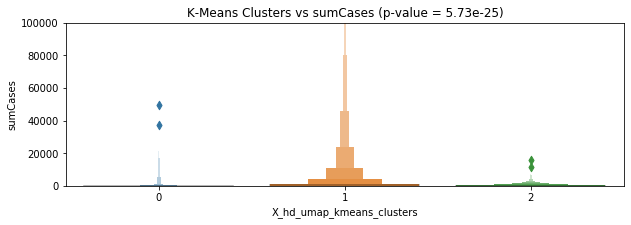

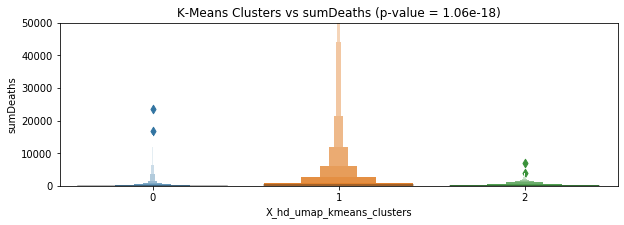

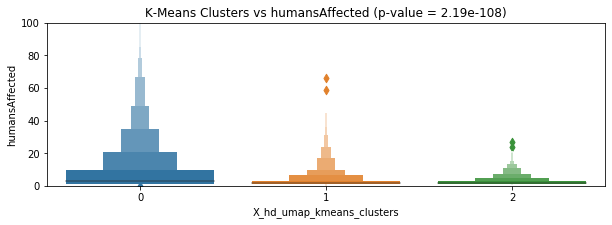

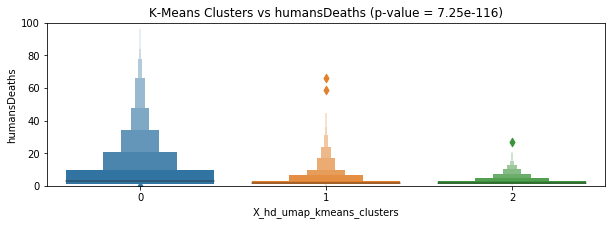

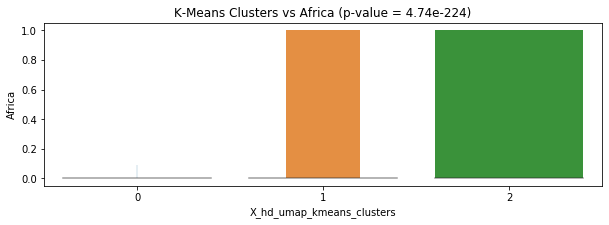

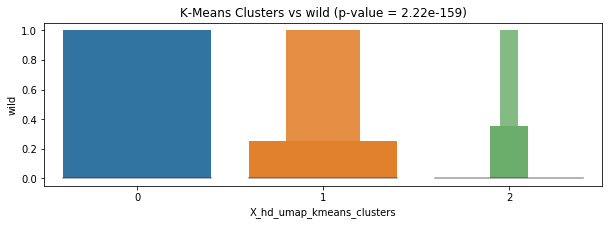

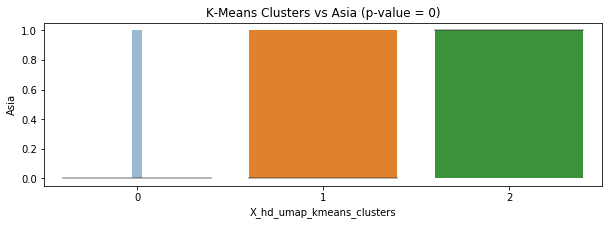

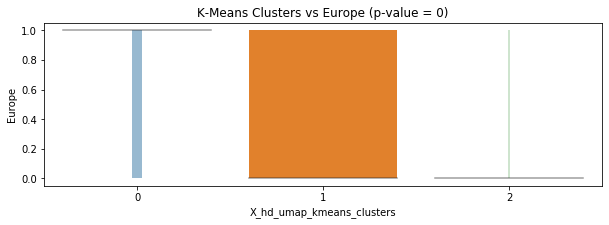

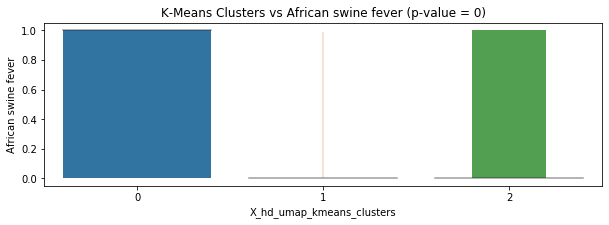

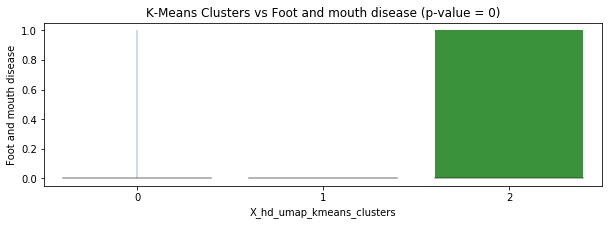

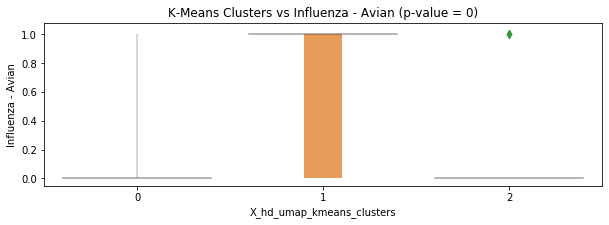

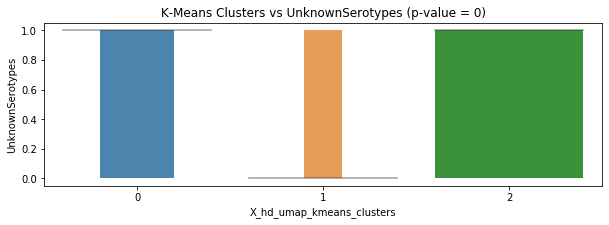

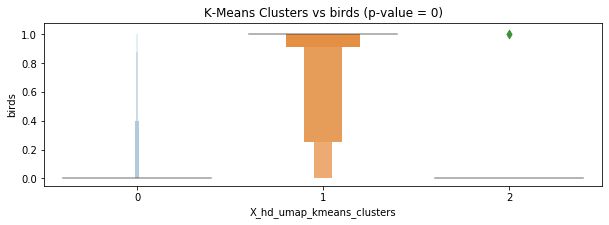

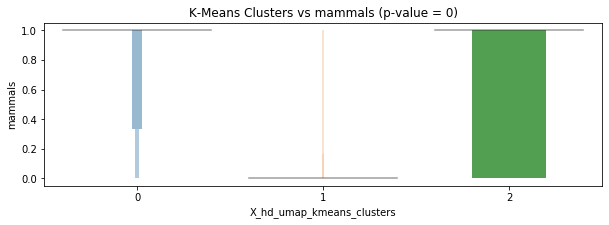

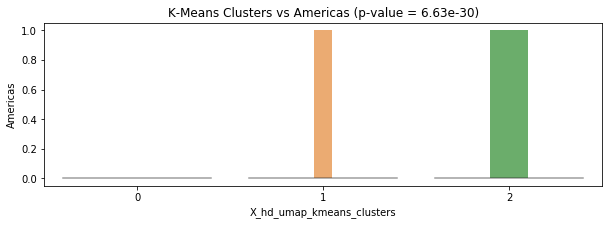

In [233]:
plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_kmeans_clusters'], y=X['sumCases'])
plt.title('K-Means Clusters vs sumCases (p-value = 5.73e-25)')
box.set_ylim(0, 100000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_kmeans_clusters'], y=X['sumDeaths'])
plt.title('K-Means Clusters vs sumDeaths (p-value = 1.06e-18)')
box.set_ylim(0, 50000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_kmeans_clusters'], y=X['humansAffected'])
plt.title('K-Means Clusters vs humansAffected (p-value = 2.19e-108)')
box.set_ylim(0, 100)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_kmeans_clusters'], y=X['humansDeaths'])
plt.title('K-Means Clusters vs humansDeaths (p-value = 7.25e-116)')
box.set_ylim(0, 100)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_kmeans_clusters'], y=X['Africa'])
plt.title('K-Means Clusters vs Africa (p-value = 4.74e-224)')
# box.set_ylim(0, 250000)
plt.show()


plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_kmeans_clusters'], y=X['wild'])
plt.title('K-Means Clusters vs wild (p-value = 2.22e-159)')
# box.set_ylim(0, 250000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_kmeans_clusters'], y=X['Asia'])
plt.title('K-Means Clusters vs Asia (p-value = 0)')
# box.set_ylim(0, 100000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_kmeans_clusters'], y=X['Europe'])
plt.title('K-Means Clusters vs Europe (p-value = 0)')
# box.set_ylim(0, 250000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_kmeans_clusters'], y=X['African swine fever'])
plt.title('K-Means Clusters vs African swine fever (p-value = 0)')
# box.set_ylim(0, 50000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_kmeans_clusters'], y=X['Foot and mouth disease'])
plt.title('K-Means Clusters vs Foot and mouth disease (p-value = 0)')
# box.set_ylim(0, 100)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_kmeans_clusters'], y=X['Influenza - Avian'])
plt.title('K-Means Clusters vs Influenza - Avian (p-value = 0)')
# box.set_ylim(0, 100)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_kmeans_clusters'], y=X['UnknownSerotypes'])
plt.title('K-Means Clusters vs UnknownSerotypes (p-value = 0)')
# box.set_ylim(0, 500)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_kmeans_clusters'], y=X['birds'])
plt.title('K-Means Clusters vs birds (p-value = 0)')
# box.set_ylim(0, 10)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_kmeans_clusters'], y=X['mammals'])
plt.title('K-Means Clusters vs mammals (p-value = 0)')
# box.set_ylim(0, 10)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=X['X_hd_umap_kmeans_clusters'], y=X['Americas'])
plt.title('K-Means Clusters vs Americas (p-value = 6.63e-30)')
# scatterplot.set_ylim(0, 600)
plt.show()



## Agglomerative Clustering for all features with PCA Components

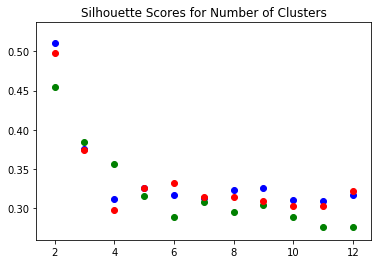

Best Silhouette score with ward linkage is 0.5106851555055669 with 2 clusters. 
Best Silhouette score with complete linkage is 0.45414087597557945 with 2 clusters. 
Best Silhouette score with average linkage is 0.49841855790133144 with 2 clusters. 
Best Davies Bouldin score:  0.7016210257927862


In [119]:
# With PCA components from all features
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


silhouettes_aggpca_complete = {} # silhoutte scores are keys, clusters are values
silhouettes_aggpca_average = {} # silhoutte scores are keys, clusters are values
dbs_aggpca = []
linkage_types = ['ward', 'complete', 'average']


# looping through cluster numbers to find the best cluster
silhouettes_aggpca_ward = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_aggpca_ward[silhouette] = cluster
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_aggpca.append(db)
        
silhouettes_aggpca_complete = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_aggpca_complete[silhouette] = cluster
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_aggpca.append(db)
        
silhouettes_aggpca_average = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_aggpca_average[silhouette] = cluster
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_aggpca.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of Clusters')  
plt.scatter(list(silhouettes_aggpca_ward.values()), list(silhouettes_aggpca_ward.keys()), color='blue')
plt.scatter(list(silhouettes_aggpca_complete.values()), list(silhouettes_aggpca_complete.keys()), color='green')
plt.scatter(list(silhouettes_aggpca_average.values()), list(silhouettes_aggpca_average.keys()), color='red')
plt.show()


print('Best Silhouette score with ward linkage is {} with {} clusters. '.format(max(silhouettes_aggpca_ward.keys()), silhouettes_aggpca_ward[max(silhouettes_aggpca_ward.keys())]))
print('Best Silhouette score with complete linkage is {} with {} clusters. '.format(max(silhouettes_aggpca_complete.keys()), silhouettes_aggpca_complete[max(silhouettes_aggpca_complete.keys())]))
print('Best Silhouette score with average linkage is {} with {} clusters. '.format(max(silhouettes_aggpca_average.keys()), silhouettes_aggpca_average[max(silhouettes_aggpca_average.keys())]))
print('Best Davies Bouldin score: ', min(dbs_aggpca))

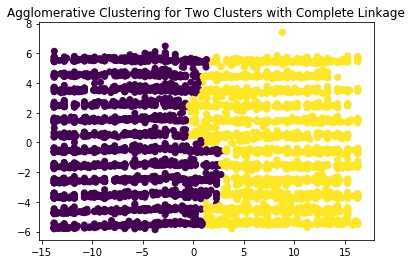

Silhouette Score:  0.5106851555055669
Davies Bouldin Index:  0.7044718125684972


In [120]:
# plotting the clusters with the best silhouette score

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)
cluster_labels = agg_cluster.fit_predict(pca_components)

plt.title('Agglomerative Clustering for Two Clusters with Complete Linkage')
plt.scatter(pca_components[:,0], pca_components[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(pca_components, cluster_labels))

## Agglomerative Clustering for humansDeaths features with PCA Components

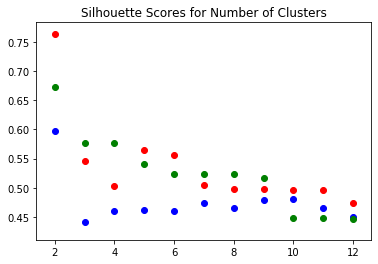

Best Silhouette score with ward linkage is 0.5967238785985322 with 2 clusters. 
Best Silhouette score with complete linkage is 0.6729285201926777 with 2 clusters. 
Best Silhouette score with average linkage is 0.7630142750960535 with 2 clusters. 
Best Davies Bouldin score:  0.18005151482058515


In [122]:
# With PCA components from features with greater than 0.01 correlation
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_hd)
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


silhouettes_aggpca_complete = {} # silhoutte scores are keys, clusters are values
silhouettes_aggpca_average = {} # silhoutte scores are keys, clusters are values
dbs_aggpca = []
linkage_types = ['ward', 'complete', 'average']


# looping through cluster numbers to find the best cluster
silhouettes_aggpca_ward = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_aggpca_ward[silhouette] = cluster
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_aggpca.append(db)
        
silhouettes_aggpca_complete = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_aggpca_complete[silhouette] = cluster
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_aggpca.append(db)
        
silhouettes_aggpca_average = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_aggpca_average[silhouette] = cluster
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_aggpca.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of Clusters')  
plt.scatter(list(silhouettes_aggpca_ward.values()), list(silhouettes_aggpca_ward.keys()), color='blue')
plt.scatter(list(silhouettes_aggpca_complete.values()), list(silhouettes_aggpca_complete.keys()), color='green')
plt.scatter(list(silhouettes_aggpca_average.values()), list(silhouettes_aggpca_average.keys()), color='red')
plt.show()


print('Best Silhouette score with ward linkage is {} with {} clusters. '.format(max(silhouettes_aggpca_ward.keys()), silhouettes_aggpca_ward[max(silhouettes_aggpca_ward.keys())]))
print('Best Silhouette score with complete linkage is {} with {} clusters. '.format(max(silhouettes_aggpca_complete.keys()), silhouettes_aggpca_complete[max(silhouettes_aggpca_complete.keys())]))
print('Best Silhouette score with average linkage is {} with {} clusters. '.format(max(silhouettes_aggpca_average.keys()), silhouettes_aggpca_average[max(silhouettes_aggpca_average.keys())]))
print('Best Davies Bouldin score: ', min(dbs_aggpca))

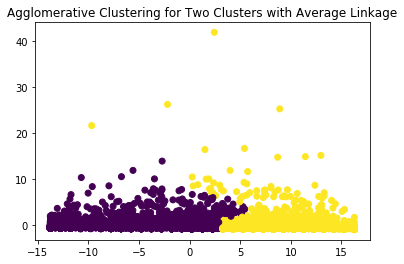

Silhouette Score:  0.5967238785986064
Davies Bouldin Index:  0.5238123636559368


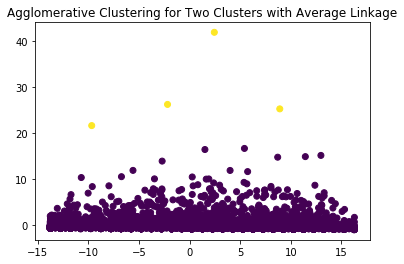

Silhouette Score:  0.6729285201930978
Davies Bouldin Index:  0.5935870341402296


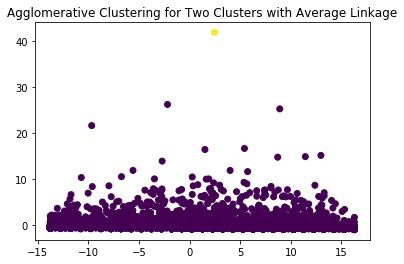

Silhouette Score:  0.7630142750963871
Davies Bouldin Index:  0.18005151482031403


In [126]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_hd)

# plotting the clusters with the best silhouette score with average linkage
linkages = ['ward', 'complete', 'average']

for link in linkages:
    agg_cluster = AgglomerativeClustering(linkage=link, 
                                      affinity='euclidean',
                                      n_clusters=2)
    cluster_labels = agg_cluster.fit_predict(pca_components)

    plt.title('Agglomerative Clustering for Two Clusters with Average Linkage')
    plt.scatter(pca_components[:,0], pca_components[:,1], c=cluster_labels)
    plt.show()

    print('Silhouette Score: ', metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean'))
    print('Davies Bouldin Index: ', metrics.davies_bouldin_score(pca_components, cluster_labels))



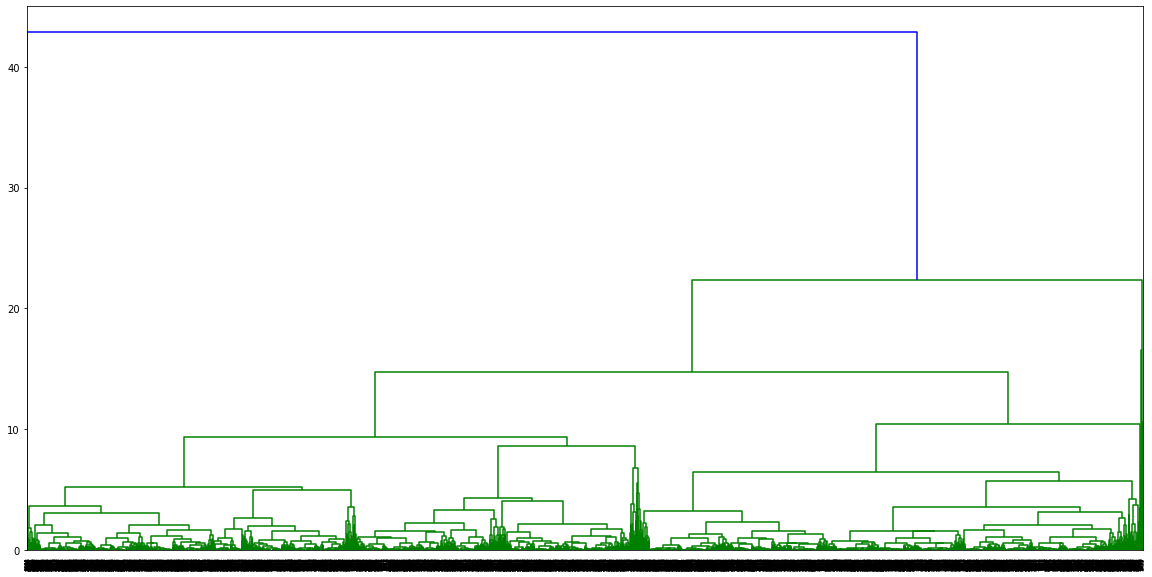

In [166]:
agg_cluster = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=2)
clusters = agg_cluster.fit_predict(pca_components)

plt.figure(figsize=(20,10))
dendrogram(lnkg(pca_components, method='average'))
plt.show()

## Agglomerative Clustering for All Features with UMAP Components

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


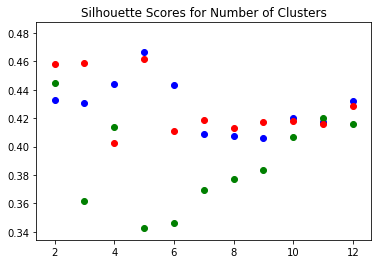

Best Silhouette score with ward linkage is 0.4668136239051819 with 5 clusters. 
Best Silhouette score with complete linkage is 0.44452768564224243 with 2 clusters. 
Best Silhouette score with average linkage is 0.4620167315006256 with 5 clusters. 
Best Davies Bouldin score:  0.6209104645067122


In [127]:
# With PCA components from all features
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_all)
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


silhouettes_aggumap_complete = {} # silhoutte scores are keys, clusters are values
silhouettes_aggumap_average = {} # silhoutte scores are keys, clusters are values
dbs_aggumap = []
linkage_types = ['ward', 'complete', 'average']


# looping through cluster numbers to find the best cluster
silhouettes_aggumap_ward = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_aggumap_ward[silhouette] = cluster
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_aggumap.append(db)
        
silhouettes_aggumap_complete = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_aggumap_complete[silhouette] = cluster
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_aggumap.append(db)
        
silhouettes_aggumap_average = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_aggumap_average[silhouette] = cluster
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_aggumap.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of Clusters')  
plt.scatter(list(silhouettes_aggumap_ward.values()), list(silhouettes_aggumap_ward.keys()), color='blue')
plt.scatter(list(silhouettes_aggumap_complete.values()), list(silhouettes_aggumap_complete.keys()), color='green')
plt.scatter(list(silhouettes_aggumap_average.values()), list(silhouettes_aggumap_average.keys()), color='red')
plt.show()


print('Best Silhouette score with ward linkage is {} with {} clusters. '.format(max(silhouettes_aggumap_ward.keys()), silhouettes_aggumap_ward[max(silhouettes_aggumap_ward.keys())]))
print('Best Silhouette score with complete linkage is {} with {} clusters. '.format(max(silhouettes_aggumap_complete.keys()), silhouettes_aggumap_complete[max(silhouettes_aggumap_complete.keys())]))
print('Best Silhouette score with average linkage is {} with {} clusters. '.format(max(silhouettes_aggumap_average.keys()), silhouettes_aggumap_average[max(silhouettes_aggumap_average.keys())]))
print('Best Davies Bouldin score: ', min(dbs_aggumap))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


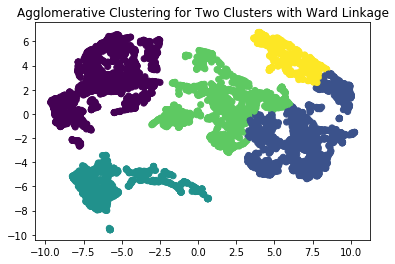

Silhouette Score:  0.4538192
Davies Bouldin Index:  0.7261713713204483


In [129]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_all)

agg_clusters = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=5)
cluster_labels = agg_clusters.fit_predict(umap_results)

plt.title('Agglomerative Clustering for Two Clusters with Ward Linkage')
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, cluster_labels))

## Agglomerative Clustering for humansDeaths Features with UMAP Components

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


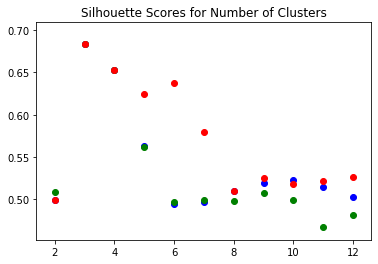

Best Silhouette score with ward linkage is 0.6833674311637878 with 3 clusters. 
Best Silhouette score with complete linkage is 0.6833674311637878 with 3 clusters. 
Best Silhouette score with average linkage is 0.6833674311637878 with 3 clusters. 
Best Davies Bouldin score:  0.44560717068131456


In [190]:
# With PCA components from features with greater than 0.01 correlation
umap_results = umap.UMAP(n_neighbors=50,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_hd)
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


silhouettes_aggumap_complete = {} # silhoutte scores are keys, clusters are values
silhouettes_aggumap_average = {} # silhoutte scores are keys, clusters are values
dbs_aggumap = []
linkage_types = ['ward', 'complete', 'average']


# looping through cluster numbers to find the best cluster
silhouettes_aggumap_ward = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_aggumap_ward[silhouette] = cluster
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_aggumap.append(db)
        
silhouettes_aggumap_complete = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_aggumap_complete[silhouette] = cluster
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_aggumap.append(db)
        
silhouettes_aggumap_average = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_aggumap_average[silhouette] = cluster
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_aggumap.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of Clusters')  
plt.scatter(list(silhouettes_aggumap_ward.values()), list(silhouettes_aggumap_ward.keys()), color='blue')
plt.scatter(list(silhouettes_aggumap_complete.values()), list(silhouettes_aggumap_complete.keys()), color='green')
plt.scatter(list(silhouettes_aggumap_average.values()), list(silhouettes_aggumap_average.keys()), color='red')
plt.show()


print('Best Silhouette score with ward linkage is {} with {} clusters. '.format(max(silhouettes_aggumap_ward.keys()), silhouettes_aggumap_ward[max(silhouettes_aggumap_ward.keys())]))
print('Best Silhouette score with complete linkage is {} with {} clusters. '.format(max(silhouettes_aggumap_complete.keys()), silhouettes_aggumap_complete[max(silhouettes_aggumap_complete.keys())]))
print('Best Silhouette score with average linkage is {} with {} clusters. '.format(max(silhouettes_aggumap_average.keys()), silhouettes_aggumap_average[max(silhouettes_aggumap_average.keys())]))
print('Best Davies Bouldin score: ', min(dbs_aggumap))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


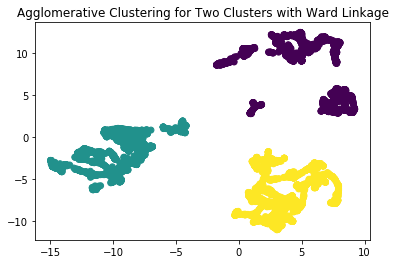

Silhouette Score:  0.6811165
Davies Bouldin Index:  0.4617187182612546


In [191]:
umap_results = umap.UMAP(n_neighbors=50,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_hd)

agg_clusters = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=3)
cluster_labels = agg_clusters.fit_predict(umap_results)

plt.title('Agglomerative Clustering for Three Clusters with Ward Linkage')
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, cluster_labels))

## Cluster Labels for humansDeaths features with UMAP Components

In [202]:
# Agglomerative Clustering with humansDeaths features

umap_results = umap.UMAP(n_neighbors=50,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_hd)

agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=3)
cluster_labels = agg_cluster.fit_predict(umap_results)
print(X.shape)
print(len(labels))
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))
X['X_hd_umap_agg_clusters'] = labels
group_0 = X[X['X_hd_umap_agg_clusters'] == 0]
group_1 = X[X['X_hd_umap_agg_clusters'] == 1]
group_2 = X[X['X_hd_umap_agg_clusters'] == 2]

get_pvalue_3clusters(X.columns)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


(5831, 285)
5831
{0: 1998, 1: 2059, 2: 1774}
Asia : [0.]
Europe : [0.]
African swine fever : [0.]
Foot and mouth disease : [0.]
Influenza - Avian : [0.]
H5N8 HPAI : [0.]
UnknownSerotypes : [0.]
birds : [0.]
mammals : [0.]
X_hd_pca_clusters : [0.]
X_hd_umap_clusters : [0.]
X_hd_umap_agg_clusters : [0.]
unspecified : [1.21831465e-298]
Africa : [4.27871341e-224]
H5N1 HPAI : [8.88961515e-183]
O : [1.27960503e-177]
wild : [1.727368e-160]
Bluetongue : [8.61911641e-144]
MERS-CoV  : [5.04559043e-127]
humansDeaths : [6.24840748e-114]
humansDeaths_std : [6.24840748e-114]
humansAffected : [1.2689801e-106]
humansAffected_std : [1.2689801e-106]
OIE : [2.93724153e-103]
H5N6 HPAI : [2.22579425e-92]
observationYear : [4.39756238e-92]
Saudi Arabia : [2.17916752e-89]
National authorities : [4.03450245e-82]
Newcastle disease : [2.01075401e-80]
Lumpy skin disease : [1.92542722e-75]
Russian Federation : [2.58641498e-75]
Rabies : [5.03163578e-74]
Taiwan (Province of China) : [1.15509446e-69]
8 : [1.62956659

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:3349: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:3349: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


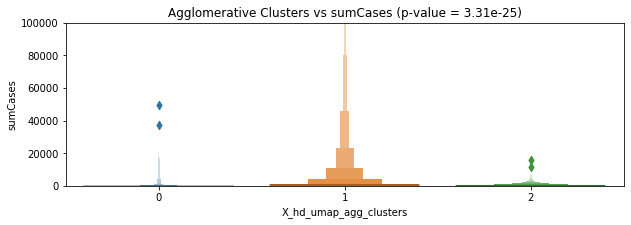

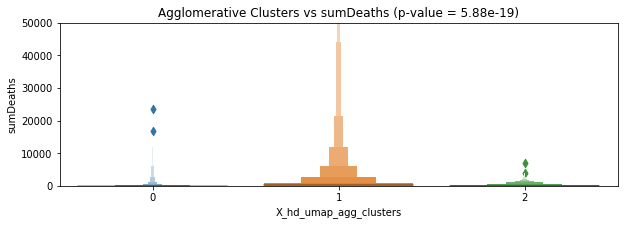

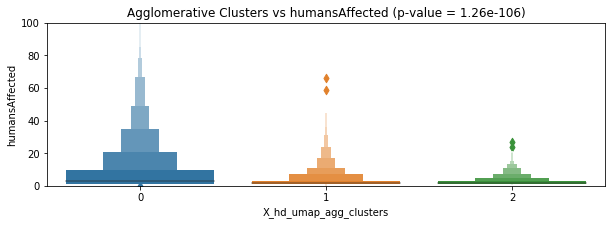

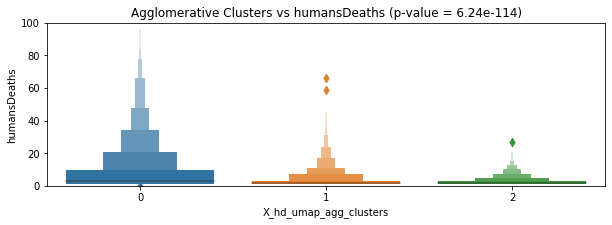

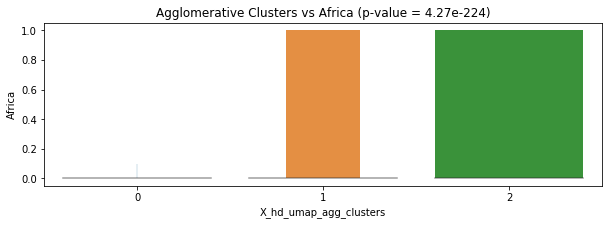

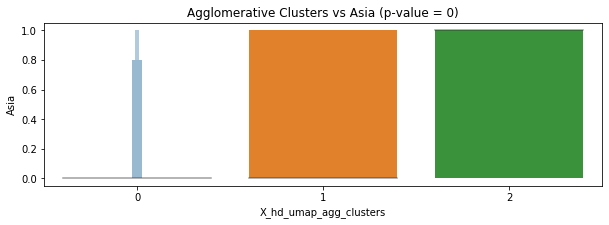

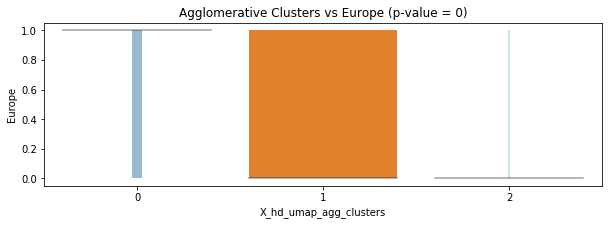

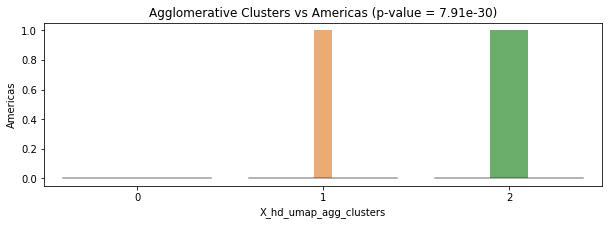

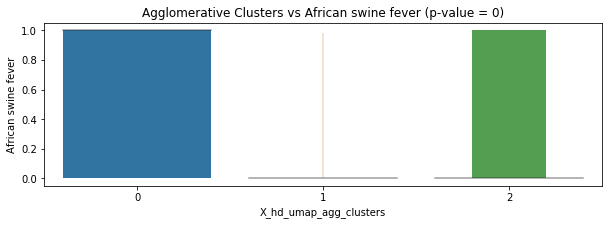

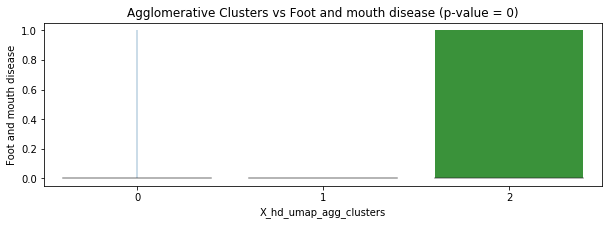

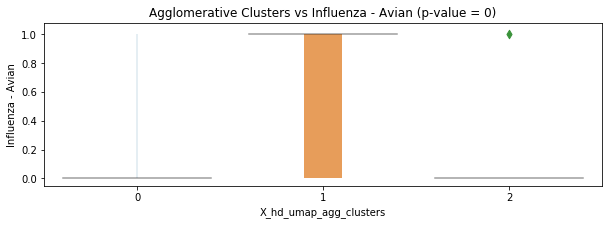

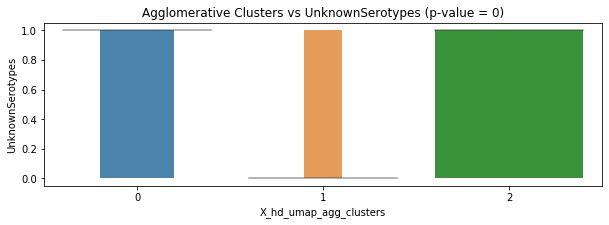

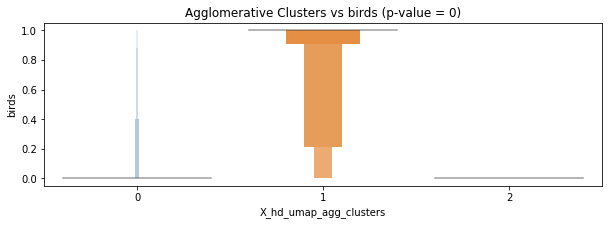

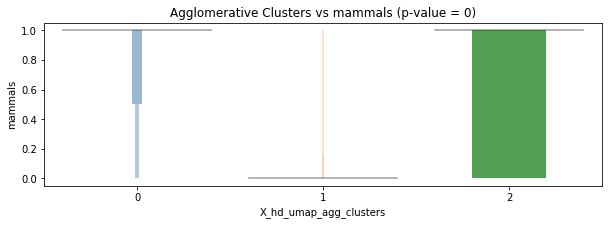

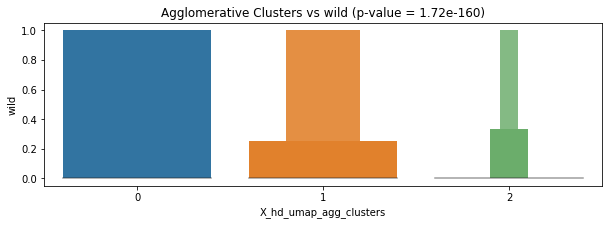

In [236]:
plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_agg_clusters'], y=X['sumCases'])
plt.title('Agglomerative Clusters vs sumCases (p-value = 3.31e-25)')
box.set_ylim(0, 100000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_agg_clusters'], y=X['sumDeaths'])
plt.title('Agglomerative Clusters vs sumDeaths (p-value = 5.88e-19)')
box.set_ylim(0, 50000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_agg_clusters'], y=X['humansAffected'])
plt.title('Agglomerative Clusters vs humansAffected (p-value = 1.26e-106)')
box.set_ylim(0, 100)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_agg_clusters'], y=X['humansDeaths'])
plt.title('Agglomerative Clusters vs humansDeaths (p-value = 6.24e-114)')
box.set_ylim(0, 100)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_agg_clusters'], y=X['Africa'])
plt.title('Agglomerative Clusters vs Africa (p-value = 4.27e-224)')
# box.set_ylim(0, 250000)
plt.show()


plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_agg_clusters'], y=X['Asia'])
plt.title('Agglomerative Clusters vs Asia (p-value = 0)')
# box.set_ylim(0, 100000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_agg_clusters'], y=X['Europe'])
plt.title('Agglomerative Clusters vs Europe (p-value = 0)')
# box.set_ylim(0, 250000)
plt.show()


plt.figure(figsize=(10,3))
sns.boxenplot(x=X['X_hd_umap_agg_clusters'], y=X['Americas'])
plt.title('Agglomerative Clusters vs Americas (p-value = 7.91e-30)')
# scatterplot.set_ylim(0, 600)
plt.show()


plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_agg_clusters'], y=X['African swine fever'])
plt.title('Agglomerative Clusters vs African swine fever (p-value = 0)')
# box.set_ylim(0, 50000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_agg_clusters'], y=X['Foot and mouth disease'])
plt.title('Agglomerative Clusters vs Foot and mouth disease (p-value = 0)')
# box.set_ylim(0, 100)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_agg_clusters'], y=X['Influenza - Avian'])
plt.title('Agglomerative Clusters vs Influenza - Avian (p-value = 0)')
# box.set_ylim(0, 100)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_agg_clusters'], y=X['UnknownSerotypes'])
plt.title('Agglomerative Clusters vs UnknownSerotypes (p-value = 0)')
# box.set_ylim(0, 500)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_agg_clusters'], y=X['birds'])
plt.title('Agglomerative Clusters vs birds (p-value = 0)')
# box.set_ylim(0, 10)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_agg_clusters'], y=X['mammals'])
plt.title('Agglomerative Clusters vs mammals (p-value = 0)')
# box.set_ylim(0, 10)
plt.show()


plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_agg_clusters'], y=X['wild'])
plt.title('Agglomerative Clusters vs wild (p-value = 1.72e-160)')
# box.set_ylim(0, 250000)
plt.show()


## DBSCAN with PCA Components 

In [137]:
def dbscan_find_clusters(eps, min_samples, X):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    num_labels = len(set(labels))
    num_samples = X.shape[0]
    silhouettes_dbscan = {}
    if num_labels == 1 or num_labels == num_samples:
          silhouette = -1
          silhouettes_dbscan[silhouette] = min_samples
          print('{} min samples and {} eps have no clusters.'.format(min_samples, eps))
    else:
          silhouette = metrics.silhouette_score(X, labels)
          print('{} min samples and {} eps have {} silhouette score.'.format(min_samples, eps, silhouette))
          return {
            'eps': eps,
            'min_samples': min_samples,
            'silhouette_score': silhouette,
            'davies_bouldin': metrics.davies_bouldin_score(X, labels)
            }
          silhouettes_dbscan[silhouette] = min_samples
    plt.title('Silhouette Scores for {} eps'.format(eps))
    plt.scatter(list(silhouettes_dbscan.values()), list(silhouettes_dbscan.keys()), color='blue')
    plt.xlabel('Min Samples')
    plt.ylabel('Silhouette Score')

2 min samples and 0.01 eps have -0.4884911409553494 silhouette score.
3 min samples and 0.01 eps have -0.6955211691536703 silhouette score.
4 min samples and 0.01 eps have -0.7720363362255394 silhouette score.
5 min samples and 0.01 eps have -0.7094985447018892 silhouette score.
6 min samples and 0.01 eps have -0.6751912224463948 silhouette score.
10 min samples and 0.01 eps have no clusters.
15 min samples and 0.01 eps have no clusters.
2 min samples and 0.5 eps have -0.43183540828354644 silhouette score.
3 min samples and 0.5 eps have -0.4026670074303445 silhouette score.
4 min samples and 0.5 eps have -0.38405200704051545 silhouette score.
5 min samples and 0.5 eps have -0.3882822453572138 silhouette score.
6 min samples and 0.5 eps have -0.38650613162094355 silhouette score.
10 min samples and 0.5 eps have -0.23873616534916867 silhouette score.
15 min samples and 0.5 eps have -0.026397282454675663 silhouette score.
2 min samples and 0.7 eps have -0.03408138208519079 silhouette scor

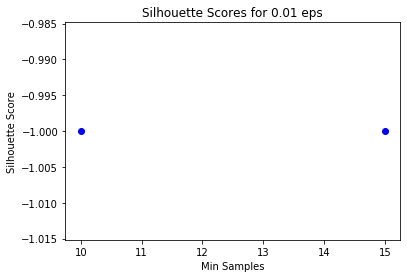

In [138]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)

results = [dbscan_find_clusters(eps, min_samples, pca_components) for eps in [0.01, 0.5, 0.7, 1] for min_samples in [2,3,4,5,6,10,15]]

## DBSCAN with PCA Components humansDeaths

In [139]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_hd)

results = [dbscan_find_clusters(eps, min_samples, pca_components) for eps in [0.01, 0.5, 0.7, 1] for min_samples in [2,3,4,5,6,10,15]]

2 min samples and 0.01 eps have -0.0582837348858435 silhouette score.
3 min samples and 0.01 eps have -0.14667309833091527 silhouette score.
4 min samples and 0.01 eps have -0.20626692336869393 silhouette score.
5 min samples and 0.01 eps have -0.255974983957423 silhouette score.
6 min samples and 0.01 eps have -0.3155424411885679 silhouette score.
10 min samples and 0.01 eps have -0.5450156094913775 silhouette score.
15 min samples and 0.01 eps have -0.7212412171864833 silhouette score.
2 min samples and 0.5 eps have -0.6231246899077053 silhouette score.
3 min samples and 0.5 eps have -0.6294229840198092 silhouette score.
4 min samples and 0.5 eps have -0.6235085788473665 silhouette score.
5 min samples and 0.5 eps have -0.6382176406567971 silhouette score.
6 min samples and 0.5 eps have -0.37018968975363564 silhouette score.
10 min samples and 0.5 eps have -0.260968435492305 silhouette score.
15 min samples and 0.5 eps have -0.28797874503584797 silhouette score.
2 min samples and 0.7

## DBSCAN with UMAP Components 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


2 min samples and 0.01 eps have -0.7625594139099121 silhouette score.
3 min samples and 0.01 eps have -0.8061507344245911 silhouette score.
4 min samples and 0.01 eps have -0.544891357421875 silhouette score.
5 min samples and 0.01 eps have 0.07225947082042694 silhouette score.
6 min samples and 0.01 eps have no clusters.
10 min samples and 0.01 eps have no clusters.
15 min samples and 0.01 eps have no clusters.
2 min samples and 0.5 eps have -0.262498140335083 silhouette score.
3 min samples and 0.5 eps have -0.262498140335083 silhouette score.
4 min samples and 0.5 eps have -0.262498140335083 silhouette score.
5 min samples and 0.5 eps have -0.1525532305240631 silhouette score.
6 min samples and 0.5 eps have -0.1525532305240631 silhouette score.
10 min samples and 0.5 eps have -0.13619635999202728 silhouette score.
15 min samples and 0.5 eps have 0.23319628834724426 silhouette score.
2 min samples and 0.7 eps have -0.14472703635692596 silhouette score.
3 min samples and 0.7 eps have 

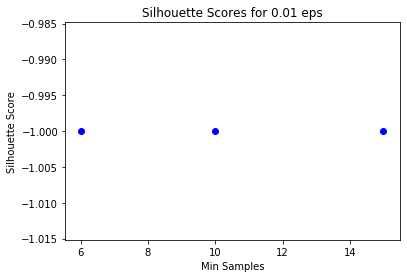

In [210]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_all)

results = [dbscan_find_clusters(eps, min_samples, umap_results) for eps in [0.01, 0.5, 0.7, 1] for min_samples in [2,3,4,5,6,10,15]]

## DBSCAN with UMAP Components humansDeaths

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


2 min samples and 0.01 eps have -0.8328733444213867 silhouette score.
3 min samples and 0.01 eps have -0.4277612268924713 silhouette score.
4 min samples and 0.01 eps have no clusters.
5 min samples and 0.01 eps have no clusters.
6 min samples and 0.01 eps have no clusters.
10 min samples and 0.01 eps have no clusters.
15 min samples and 0.01 eps have no clusters.
2 min samples and 0.5 eps have -0.15275540947914124 silhouette score.
3 min samples and 0.5 eps have -0.15275540947914124 silhouette score.
4 min samples and 0.5 eps have -0.15275540947914124 silhouette score.
5 min samples and 0.5 eps have -0.15275540947914124 silhouette score.
6 min samples and 0.5 eps have 0.04439644515514374 silhouette score.
10 min samples and 0.5 eps have 0.10259266942739487 silhouette score.
15 min samples and 0.5 eps have 0.08114739507436752 silhouette score.
2 min samples and 0.7 eps have -0.15580321848392487 silhouette score.
3 min samples and 0.7 eps have -0.15580321848392487 silhouette score.
4 mi

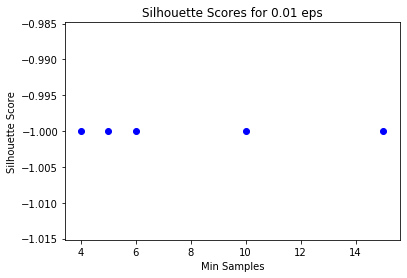

In [209]:
umap_results = umap.UMAP(n_neighbors=50,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X_hd)

results = [dbscan_find_clusters(eps, min_samples, umap_results) for eps in [0.01, 0.5, 0.7, 1] for min_samples in [2,3,4,5,6,10,15]]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


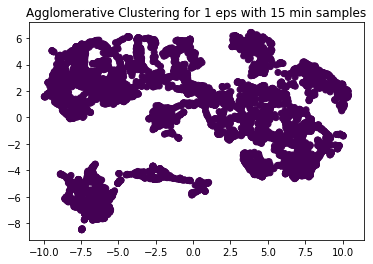

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [211]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_all)

dbscan = DBSCAN(eps=1, min_samples=10)
labels = dbscan.fit_predict(X_all)

plt.title('Agglomerative Clustering for 1 eps with 10 min samples')
plt.scatter(umap_results[:,0], umap_results[:,1], c=labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, labels))

## GMM With PCA Components

In [154]:
 def gmm_find_clusters(n_components, covariance_type, X):
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    labels = gmm.fit_predict(X)
    num_labels = len(set(labels))
    num_samples = X.shape[0]
    silhouettes_gmm = {}
    if num_labels == 1 or num_labels == num_samples:
        silhouette = -1
        silhouettes_dbscan[silhouette] = min_samples
        print('{} n components and {} covariance have no clusters.'.format(n_components, covariance_type))
    else:
          silhouette = metrics.silhouette_score(X, labels)
          print('{} n components and {} covariance have {} silhouette score.'.format(n_components, covariance_type, silhouette))
          return {
            'n_components': n_components,
            'covariance_type': covariance_type,
            'silhouette_score': silhouette,
            'davies_bouldin': metrics.davies_bouldin_score(X, labels)
            }
          silhouettes_dbscan[silhouette] = n_components
    plt.title('Silhouette Scores for {} covariance'.format(covariance_type))
    plt.scatter(list(silhouettes_gmm.values()), list(silhouettes_gmm.keys()), color='blue')
    plt.xlabel('Number of Components')
    plt.ylabel('Silhouette Score')
    plt.show()

In [155]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)

results = [gmm_find_clusters(n_components,covariance_type, pca_components) for n_components in [2,3,4,5,6,10,15]
           for covariance_type in ['full','tied','diag','spherical']]

2 n components and full covariance have 0.5206210496733005 silhouette score.
2 n components and tied covariance have 0.5205169898344683 silhouette score.
2 n components and diag covariance have 0.5207080559733684 silhouette score.
2 n components and spherical covariance have 0.5208114297992683 silhouette score.
3 n components and full covariance have 0.39989722722642645 silhouette score.
3 n components and tied covariance have 0.4004384723520866 silhouette score.
3 n components and diag covariance have 0.400913626274906 silhouette score.
3 n components and spherical covariance have 0.402761501538592 silhouette score.
4 n components and full covariance have 0.3304624081861043 silhouette score.
4 n components and tied covariance have 0.36152294331565493 silhouette score.
4 n components and diag covariance have 0.3566374917944421 silhouette score.
4 n components and spherical covariance have 0.34425383729336 silhouette score.
5 n components and full covariance have 0.25261106194971344 sil

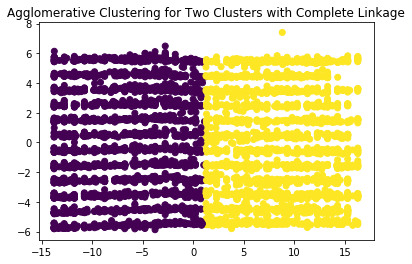

Silhouette Score:  0.5208114297992674
Davies Bouldin Index:  0.6960126094822283


In [157]:
# plotting the clusters with the best silhouette score

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)
gmm = GaussianMixture(n_components=2, covariance_type='spherical')
cluster_labels = gmm.fit_predict(pca_components)

plt.title('Agglomerative Clustering for Two Clusters with Complete Linkage')
plt.scatter(pca_components[:,0], pca_components[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(pca_components, cluster_labels))

## GMM Clustering with humansDeaths PCA Components

In [156]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_hd)

results = [gmm_find_clusters(n_components,covariance_type, pca_components) for n_components in [2,3,4,5,6,10,15]
           for covariance_type in ['full','tied','diag','spherical']]

2 n components and full covariance have 0.03509396467346213 silhouette score.
2 n components and tied covariance have 0.6086453268323717 silhouette score.
2 n components and diag covariance have 0.03613052255637151 silhouette score.
2 n components and spherical covariance have 0.6094309771373654 silhouette score.
3 n components and full covariance have -0.003118922240468464 silhouette score.
3 n components and tied covariance have 0.5412693814749096 silhouette score.
3 n components and diag covariance have 0.29934302764828075 silhouette score.
3 n components and spherical covariance have 0.5340522813490777 silhouette score.
4 n components and full covariance have 0.11689670475534783 silhouette score.
4 n components and tied covariance have 0.5197127831853705 silhouette score.
4 n components and diag covariance have 0.12342081268252503 silhouette score.
4 n components and spherical covariance have 0.5006597884036816 silhouette score.
5 n components and full covariance have 0.09437497556

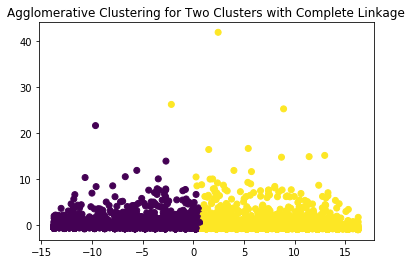

Silhouette Score:  0.6094309771366926
Davies Bouldin Index:  0.530975103375105


In [158]:
# plotting the clusters with the best silhouette score

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_hd)
gmm = GaussianMixture(n_components=2, covariance_type='spherical')
cluster_labels = gmm.fit_predict(pca_components)

plt.title('Agglomerative Clustering for Two Clusters with Complete Linkage')
plt.scatter(pca_components[:,0], pca_components[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(pca_components, cluster_labels))

## GMM Clustering for All Features with UMAP Components

In [213]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_all)

results = [gmm_find_clusters(n_components,covariance_type, umap_results) for n_components in [2,3,4,5,6,10,15]
           for covariance_type in ['full','tied','diag','spherical']]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


2 n components and full covariance have 0.5403739213943481 silhouette score.
2 n components and tied covariance have 0.5420203804969788 silhouette score.
2 n components and diag covariance have 0.5387932658195496 silhouette score.
2 n components and spherical covariance have 0.541626513004303 silhouette score.
3 n components and full covariance have 0.4197215735912323 silhouette score.
3 n components and tied covariance have 0.3697264492511749 silhouette score.
3 n components and diag covariance have 0.5470892190933228 silhouette score.
3 n components and spherical covariance have 0.521313488483429 silhouette score.
4 n components and full covariance have 0.47177812457084656 silhouette score.
4 n components and tied covariance have 0.47069576382637024 silhouette score.
4 n components and diag covariance have 0.46812090277671814 silhouette score.
4 n components and spherical covariance have 0.45518556237220764 silhouette score.
5 n components and full covariance have 0.45743921399116516

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


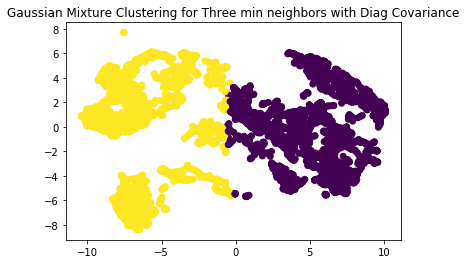

Silhouette Score:  0.5083407
Davies Bouldin Index:  0.7696019020730416


In [217]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_all)

gmm = GaussianMixture(n_components=2, covariance_type='diag')
cluster_labels = gmm.fit_predict(umap_results)

plt.title('Gaussian Mixture Clustering for Three min neighbors with Diag Covariance')
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, cluster_labels))

## GMM Clustering for humansDeaths Features with UMAP Components

In [221]:
umap_results = umap.UMAP(n_neighbors=50,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_hd)

results = [gmm_find_clusters(n_components,covariance_type, umap_results) for n_components in [2,3,4,5,6,10,15]
           for covariance_type in ['full','tied','diag','spherical']]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


2 n components and full covariance have 0.47999173402786255 silhouette score.
2 n components and tied covariance have 0.5369216799736023 silhouette score.
2 n components and diag covariance have 0.5369216799736023 silhouette score.
2 n components and spherical covariance have 0.509118378162384 silhouette score.
3 n components and full covariance have 0.6881573796272278 silhouette score.
3 n components and tied covariance have 0.6881573796272278 silhouette score.
3 n components and diag covariance have 0.6881573796272278 silhouette score.
3 n components and spherical covariance have 0.6881573796272278 silhouette score.
4 n components and full covariance have 0.6578050255775452 silhouette score.
4 n components and tied covariance have 0.5739463567733765 silhouette score.
4 n components and diag covariance have 0.5730950832366943 silhouette score.
4 n components and spherical covariance have 0.6578050255775452 silhouette score.
5 n components and full covariance have 0.5546225309371948 si

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


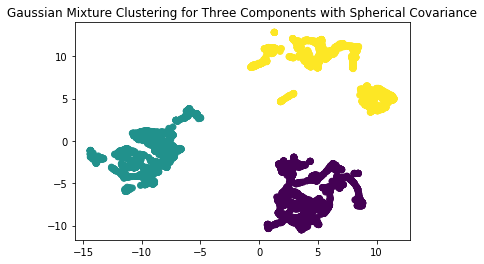

Silhouette Score:  0.6997207
Davies Bouldin Index:  0.44435550692778714


In [219]:
umap_results = umap.UMAP(n_neighbors=50,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_hd)

gmm = GaussianMixture(n_components=3, covariance_type='spherical')
cluster_labels = gmm.fit_predict(umap_results)

plt.title('Gaussian Mixture Clustering for Three Components with Spherical Covariance')
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, cluster_labels))

In [222]:
umap_results = umap.UMAP(n_neighbors=50,
                      min_dist=0.1,
                      metric='correlation').fit_transform(X_hd)

gmm = GaussianMixture(n_components=3, covariance_type='spherical')
labels = gmm.fit_predict(umap_results)

print(X.shape)
print(len(labels))
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))
X['X_hd_umap_gmm_clusters'] = labels
group_0 = X[X['X_hd_umap_gmm_clusters'] == 0]
group_1 = X[X['X_hd_umap_gmm_clusters'] == 1]
group_2 = X[X['X_hd_umap_gmm_clusters'] == 2]

get_pvalue_3clusters(X.columns)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


(5831, 285)
5831
{0: 2060, 1: 1774, 2: 1997}
Asia : [0.]
Europe : [0.]
African swine fever : [0.]
Foot and mouth disease : [0.]
Influenza - Avian : [0.]
H5N8 HPAI : [0.]
UnknownSerotypes : [0.]
birds : [0.]
mammals : [0.]
X_hd_pca_clusters : [0.]
X_hd_umap_clusters : [0.]
X_hd_umap_agg_clusters : [0.]
X_hd_umap_gmm_clusters : [0.]
unspecified : [6.6036233e-299]
Africa : [4.72478678e-224]
H5N1 HPAI : [1.24697845e-182]
O : [1.27926729e-177]
wild : [1.16923802e-160]
Bluetongue : [6.50302003e-144]
MERS-CoV  : [5.04558937e-127]
humansDeaths : [2.27365527e-112]
humansDeaths_std : [2.27365527e-112]
humansAffected : [3.39251635e-105]
humansAffected_std : [3.39251635e-105]
OIE : [7.00360197e-104]
H5N6 HPAI : [2.62623457e-92]
observationYear : [4.02088055e-92]
Saudi Arabia : [2.18339336e-89]
National authorities : [8.74210768e-83]
Newcastle disease : [2.31785704e-80]
Lumpy skin disease : [1.63311507e-75]
Russian Federation : [2.18749983e-75]
Rabies : [5.02876548e-74]
Taiwan (Province of China) :

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:3349: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:3349: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


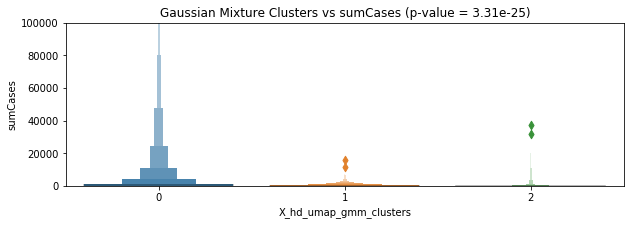

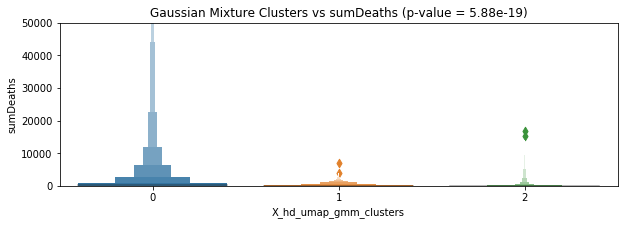

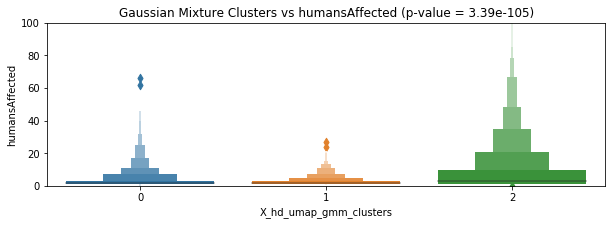

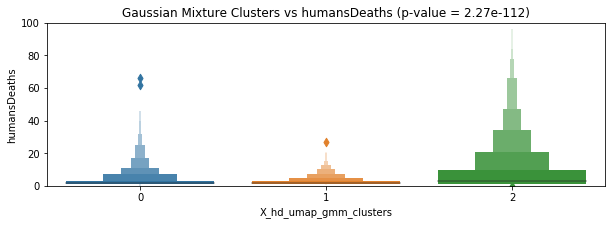

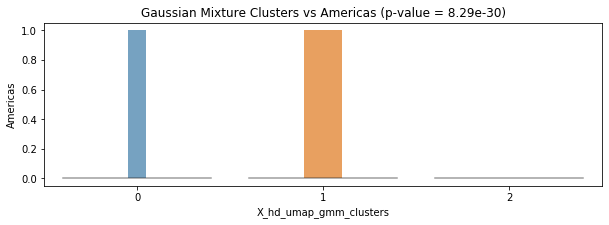

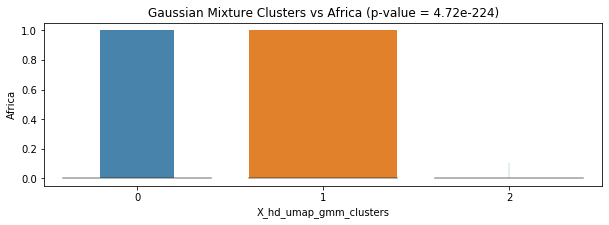

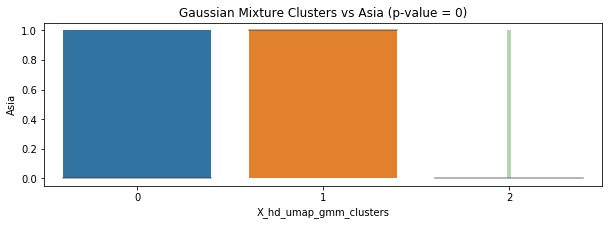

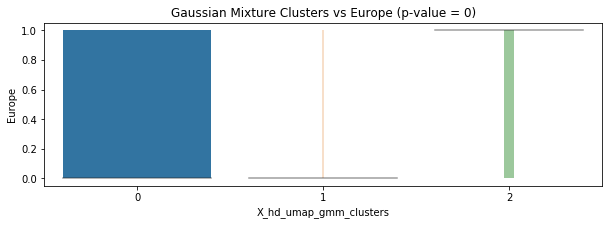

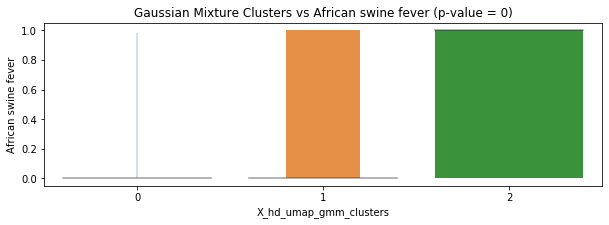

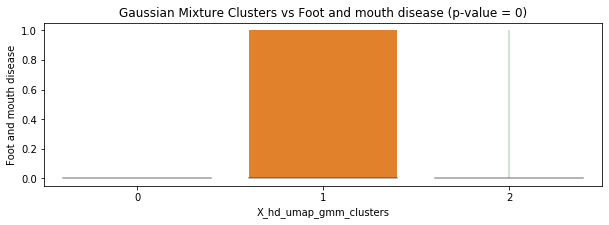

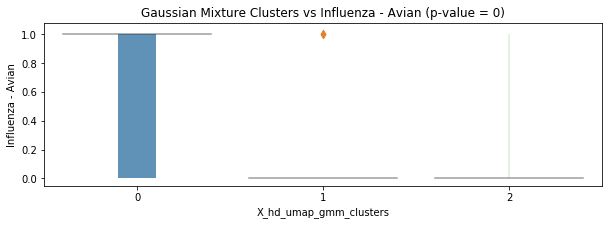

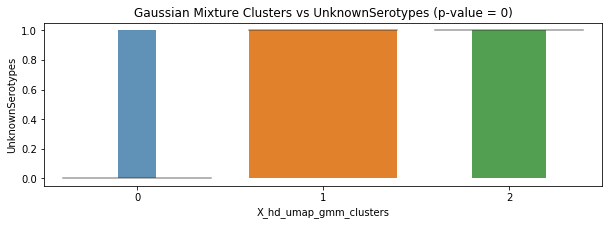

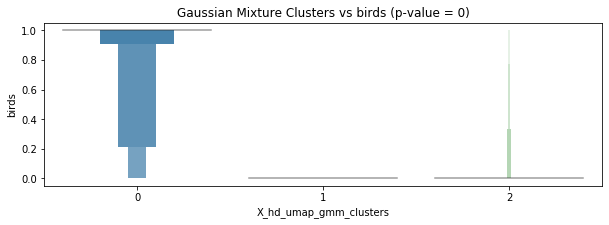

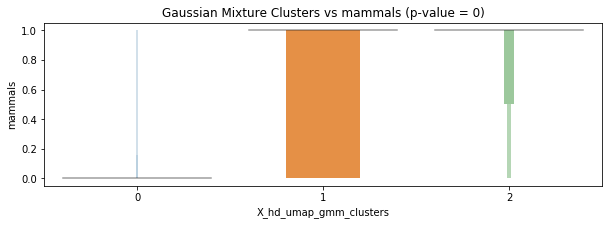

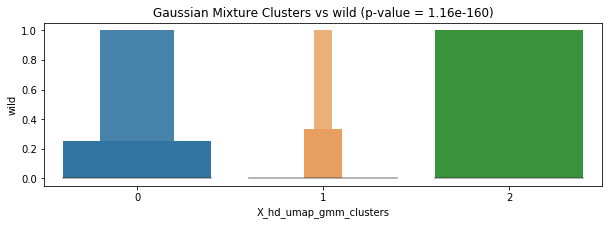

In [235]:
plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_gmm_clusters'], y=X['sumCases'])
plt.title('Gaussian Mixture Clusters vs sumCases (p-value = 3.31e-25)')
box.set_ylim(0, 100000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_gmm_clusters'], y=X['sumDeaths'])
plt.title('Gaussian Mixture Clusters vs sumDeaths (p-value = 5.88e-19)')
box.set_ylim(0, 50000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_gmm_clusters'], y=X['humansAffected'])
plt.title('Gaussian Mixture Clusters vs humansAffected (p-value = 3.39e-105)')
box.set_ylim(0, 100)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_gmm_clusters'], y=X['humansDeaths'])
plt.title('Gaussian Mixture Clusters vs humansDeaths (p-value = 2.27e-112)')
box.set_ylim(0, 100)
plt.show()


plt.figure(figsize=(10,3))
sns.boxenplot(x=X['X_hd_umap_gmm_clusters'], y=X['Americas'])
plt.title('Gaussian Mixture Clusters vs Americas (p-value = 8.29e-30)')
# scatterplot.set_ylim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_gmm_clusters'], y=X['Africa'])
plt.title('Gaussian Mixture Clusters vs Africa (p-value = 4.72e-224)')
# box.set_ylim(0, 250000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_gmm_clusters'], y=X['Asia'])
plt.title('Gaussian Mixture Clusters vs Asia (p-value = 0)')
# box.set_ylim(0, 100000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_gmm_clusters'], y=X['Europe'])
plt.title('Gaussian Mixture Clusters vs Europe (p-value = 0)')
# box.set_ylim(0, 250000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_gmm_clusters'], y=X['African swine fever'])
plt.title('Gaussian Mixture Clusters vs African swine fever (p-value = 0)')
# box.set_ylim(0, 50000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_gmm_clusters'], y=X['Foot and mouth disease'])
plt.title('Gaussian Mixture Clusters vs Foot and mouth disease (p-value = 0)')
# box.set_ylim(0, 100)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_gmm_clusters'], y=X['Influenza - Avian'])
plt.title('Gaussian Mixture Clusters vs Influenza - Avian (p-value = 0)')
# box.set_ylim(0, 100)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_gmm_clusters'], y=X['UnknownSerotypes'])
plt.title('Gaussian Mixture Clusters vs UnknownSerotypes (p-value = 0)')
# box.set_ylim(0, 500)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_gmm_clusters'], y=X['birds'])
plt.title('Gaussian Mixture Clusters vs birds (p-value = 0)')
# box.set_ylim(0, 10)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_gmm_clusters'], y=X['mammals'])
plt.title('Gaussian Mixture Clusters vs mammals (p-value = 0)')
# box.set_ylim(0, 10)
plt.show()


plt.figure(figsize=(10,3))
box = sns.boxenplot(x=X['X_hd_umap_gmm_clusters'], y=X['wild'])
plt.title('Gaussian Mixture Clusters vs wild (p-value = 1.16e-160)')
# box.set_ylim(0, 250000)
plt.show()

# Conclusions

- three clusters: humans, animals, not severe

